In [0]:
# We will be using a forked version of Darknet which allow us to suppress the display from OpenCV, when running 
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

datalab
Cloning into 'darknet'...
remote: Counting objects: 7021, done.
remote: Total 7021 (delta 0), reused 0 (delta 0), pack-reused 7020
Receiving objects: 100% (7021/7021), 6.44 MiB | 20.66 MiB/s, done.
Resolving deltas: 100% (4664/4664), done.


In [0]:
!ls
%cd darknet
!ls
% cd ..

darknet  datalab
/content/darknet
3rdparty    data	     Makefile	      scripts
build	    image_yolov2.sh  mjpeg_stream.sh  src
cfg	    image_yolov3.sh  net_cam_v3.sh    video_v2.sh
darknet.py  LICENSE	     README.md	      video_yolov3.sh
/content


In [0]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2018-05-30 06:11:46--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?GLyCEkY2nlfgOgiPME7oaO1--3KOyb21fHZla4hvARARqghF_yluBKF0H0dU6R24J2RwhVZ76WqZ0euYJfKlzJTU7oaOVi_V49lcfFwUG765ABurUYdr5cDRSw9W6NYR8sxmLRu4G9fP6mN6Z02b0bMV1ZtFn414qVlH7lDwYx58jnzhE17IZXqZja9AXuoETJMimYB7dwQRPS_2SXShkXURRg [following]
--2018-05-30 06:11:46--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?GLyCEkY2nlfgOgiPME7oaO1--3KOyb21fHZla4hvARARqghF_yluBKF0H0dU6R24J2RwhVZ76WqZ0euYJfKlzJTU7oaO

Selecting previously unselected package cuda-repo-ubuntu1604-8-0-local-ga2.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Setting up cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Note: Check first if apt-key functionality is needed at all - it probably isn't!
OK


In [0]:
#Advanced Packaging Tool (APT) - to find and install new packages, upgrade packages, clean the packages etc
#apt (like most package managers) has a local cache of what packages are available (and where to get them). `apt-get update` updates that list.  
#From a user's perspective, this allows you to see if there are any new versions of your installed packages, and can sometimes fix download issues
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:4 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Hit:5 http://archive.ubuntu.com/ubuntu artful InRelease
Get:6 file:/var/cuda-repo-8-0-local-ga2  Packages [22.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
Get:9 http://security.ubuntu.com/ubuntu artful-security/universe Sources [20.5 kB]
Get:10 http://security.ubuntu.com/ubuntu artful-security/main amd64 Packages [220 kB]
Get:11 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [43.2 kB]
Get:12 http://security.ubuntu.com/ubuntu artful-security/multiverse a

In [0]:
#Installing CUDA
!apt install cuda-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  accountsservice acpid activity-log-manager adwaita-icon-theme apg aspell
  aspell-en at-spi2-core avahi-daemon avahi-utils bbswitch-dkms bind9-host
  bluez bluez-obexd bsdmainutils ca-certificates-java cheese-common
  cracklib-runtime crda cuda-command-line-tools-8-0 cuda-core-8-0
  cuda-cublas-8-0 cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0
  cuda-cufft-8-0 cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0
  cuda-cusolver-8-0 cuda-cusolver-dev-8-0 cuda-cusparse-8-0
  cuda-cusparse-dev-8-0 cuda-demo-suite-8-0 cuda-documentation-8-0
  cuda-driver-dev-8-0 cuda-drivers cuda-license-8-0 cuda-misc-headers-8-0
  cuda-npp-8-0 cuda-npp-dev-8-0 cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0
  cuda-nvml-dev-8-0 cuda-nvrtc-8-0 cuda-nvrtc-dev-8-0 cuda-runtime-8-0
  cuda-samples-8-0 cuda-toolkit-8-0 cuda-visual-tools-8-0 cups-pk-helper dbus
 

Get:4 file:/var/cuda-repo-8-0-local-ga2  cuda-core-8-0 8.0.61-1 [20.0 MB]
Get:5 file:/var/cuda-repo-8-0-local-ga2  cuda-cudart-8-0 8.0.61-1 [135 kB]
Get:6 file:/var/cuda-repo-8-0-local-ga2  cuda-driver-dev-8-0 8.0.61-1 [14.1 kB]
Get:7 http://archive.ubuntu.com/ubuntu artful/main amd64 keyboard-configuration all 1.166ubuntu7 [622 kB]
Get:8 file:/var/cuda-repo-8-0-local-ga2  cuda-cudart-dev-8-0 8.0.61-1 [1,071 kB]
Get:9 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libapparmor1 amd64 2.11.0-2ubuntu17.1 [28.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu artful/main amd64 libcap2 amd64 1:2.25-1.1 [13.2 kB]
Get:11 http://archive.ubuntu.com/ubuntu artful/main amd64 libdevmapper1.02.1 amd64 2:1.02.137-2ubuntu3 [135 kB]
Get:12 http://archive.ubuntu.com/ubuntu artful/main amd64 libcryptsetup4 amd64 2:1.7.3-4ubuntu1 [77.3 kB]
Get:13 http://archive.ubuntu.com/ubuntu artful/main amd64 libip4tc0 amd64 1.6.1-2ubuntu1 [19.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu artful/main amd64 lib

Get:92 http://archive.ubuntu.com/ubuntu artful/main amd64 libdrm-common all 2.4.83-1 [4,938 B]
Get:93 http://archive.ubuntu.com/ubuntu artful/main amd64 libdrm2 amd64 2.4.83-1 [30.6 kB]
Get:94 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libwayland-server0 amd64 1.14.0-1ubuntu0.1 [28.5 kB]
Get:95 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libgbm1 amd64 17.2.8-0ubuntu0~17.10.1 [24.4 kB]
Get:96 file:/var/cuda-repo-8-0-local-ga2  cuda-cublas-8-0 8.0.61-1 [27.2 MB]
Get:97 http://archive.ubuntu.com/ubuntu artful/main amd64 libx11-xcb1 amd64 2:1.6.4-3 [9,626 B]
Get:98 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-dri2-0 amd64 1.12-1ubuntu1 [6,838 B]
Get:99 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-dri3-0 amd64 1.12-1ubuntu1 [5,156 B]
Get:100 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-present0 amd64 1.12-1ubuntu1 [5,436 B]
Get:101 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-sync1 amd64 1.12-1ubuntu1 [8,746 

Get:132 file:/var/cuda-repo-8-0-local-ga2  cuda-cufft-8-0 8.0.61-1 [117 MB]
Get:133 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libgtk-3-0 amd64 3.22.25-0ubuntu0.1 [2,540 kB]
Get:134 http://archive.ubuntu.com/ubuntu artful/main amd64 libindicator3-7 amd64 16.10.0+16.10.20160913-0ubuntu1 [26.1 kB]
Get:135 http://archive.ubuntu.com/ubuntu artful/main amd64 libappindicator3-1 amd64 12.10.1+17.04.20170215-0ubuntu2 [19.2 kB]
Get:136 http://archive.ubuntu.com/ubuntu artful/main amd64 libcdparanoia0 amd64 3.10.2+debian-11 [53.1 kB]
Get:137 http://archive.ubuntu.com/ubuntu artful/main amd64 libdaemon0 amd64 0.14-6 [16.6 kB]
Get:138 http://archive.ubuntu.com/ubuntu artful/main amd64 liblzo2-2 amd64 2.08-1.2 [48.7 kB]
Get:139 http://archive.ubuntu.com/ubuntu artful/main amd64 libmtdev1 amd64 1.1.5-1ubuntu2 [13.8 kB]
Get:140 http://archive.ubuntu.com/ubuntu artful/main amd64 libmtp-common all 1.1.13-1 [43.6 kB]
Get:141 http://archive.ubuntu.com/ubuntu artful/main amd64 libusb-1.0-0

Get:174 http://archive.ubuntu.com/ubuntu artful/main amd64 libmnl0 amd64 1.0.4-2 [12.3 kB]
Get:175 file:/var/cuda-repo-8-0-local-ga2  cuda-cusparse-8-0 8.0.61-1 [28.8 MB]
Get:176 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 iproute2 amd64 4.9.0-1ubuntu2.1 [628 kB]
Get:177 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libisc-export160 amd64 1:9.10.3.dfsg.P4-12.6ubuntu1.1 [155 kB]
Get:178 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libdns-export162 amd64 1:9.10.3.dfsg.P4-12.6ubuntu1.1 [671 kB]
Get:179 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 isc-dhcp-client amd64 4.3.5-3ubuntu2.3 [244 kB]
Get:180 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 isc-dhcp-common amd64 4.3.5-3ubuntu2.3 [45.8 kB]
Get:181 file:/var/cuda-repo-8-0-local-ga2  cuda-cusparse-dev-8-0 8.0.61-1 [29.6 MB]
Get:182 http://archive.ubuntu.com/ubuntu artful/main amd64 kmod amd64 24-1ubuntu2 [88.7 kB]
Get:183 http://archive.ubuntu.com/ubuntu artful/main a

Get:214 http://archive.ubuntu.com/ubuntu artful/main amd64 libiptc0 amd64 1.6.1-2ubuntu1 [9,254 B]
Get:215 http://archive.ubuntu.com/ubuntu artful/main amd64 libnetfilter-conntrack3 amd64 1.0.6-2 [37.8 kB]
Get:216 http://archive.ubuntu.com/ubuntu artful/main amd64 iptables amd64 1.6.1-2ubuntu1 [269 kB]
Get:217 http://archive.ubuntu.com/ubuntu artful/main amd64 iso-codes all 3.75-1 [2,339 kB]
Get:218 http://archive.ubuntu.com/ubuntu artful/main amd64 libdbus-glib-1-2 amd64 0.108-2 [67.1 kB]
Get:219 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libparted2 amd64 3.2-18ubuntu0.1 [123 kB]
Get:220 http://archive.ubuntu.com/ubuntu artful/main amd64 libpcap0.8 amd64 1.8.1-5ubuntu1 [118 kB]
Get:221 http://archive.ubuntu.com/ubuntu artful/main amd64 libpci3 amd64 1:3.5.2-1ubuntu1 [24.1 kB]
Get:222 http://archive.ubuntu.com/ubuntu artful/main amd64 libxmuu1 amd64 2:1.1.2-2 [9,674 B]
Get:223 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 parted amd64 3.2-18ubuntu0.1 [42.3 

Get:253 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libavahi-core7 amd64 0.6.32-1ubuntu1.1 [81.4 kB]
Get:254 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 avahi-daemon amd64 0.6.32-1ubuntu1.1 [60.9 kB]
Get:255 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 avahi-utils amd64 0.6.32-1ubuntu1.1 [24.8 kB]
Get:256 http://archive.ubuntu.com/ubuntu artful/main amd64 bluez amd64 5.46-0ubuntu3 [901 kB]
Get:257 file:/var/cuda-repo-8-0-local-ga2  cuda-documentation-8-0 8.0.61-1 [113 MB]
Get:258 file:/var/cuda-repo-8-0-local-ga2  cuda-nvml-dev-8-0 8.0.61-1 [48.4 kB]
Get:259 file:/var/cuda-repo-8-0-local-ga2  cuda-nvgraph-8-0 8.0.61-1 [2,948 kB]
Get:260 file:/var/cuda-repo-8-0-local-ga2  cuda-nvgraph-dev-8-0 8.0.61-1 [3,028 kB]
Get:261 http://archive.ubuntu.com/ubuntu artful/main amd64 libical2 amd64 2.0.0-0.5 [194 kB]
Get:262 http://archive.ubuntu.com/ubuntu artful/main amd64 bluez-obexd amd64 5.46-0ubuntu3 [167 kB]
Get:263 http://archive.ubuntu.com/ubuntu a

Get:294 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-dri2-0-dev amd64 1.12-1ubuntu1 [8,376 B]
Get:295 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-glx0-dev amd64 1.12-1ubuntu1 [27.5 kB]
Get:296 http://archive.ubuntu.com/ubuntu artful/main amd64 x11proto-xext-dev all 7.3.0-1 [212 kB]
Get:297 http://archive.ubuntu.com/ubuntu artful/main amd64 x11proto-fixes-dev all 1:5.0-2ubuntu2 [14.2 kB]
Get:298 http://archive.ubuntu.com/ubuntu artful/main amd64 libxfixes-dev amd64 1:5.0.3-1 [11.0 kB]
Get:299 http://archive.ubuntu.com/ubuntu artful/main amd64 x11proto-damage-dev all 1:1.2.1-2 [8,286 B]
Get:300 http://archive.ubuntu.com/ubuntu artful/main amd64 libxdamage-dev amd64 1:1.1.4-3 [5,028 B]
Get:301 http://archive.ubuntu.com/ubuntu artful/main amd64 libxext-dev amd64 2:1.3.3-1 [82.1 kB]
Get:302 http://archive.ubuntu.com/ubuntu artful/main amd64 x11proto-xf86vidmode-dev all 2.3.1-2 [6,116 B]
Get:303 http://archive.ubuntu.com/ubuntu artful/main amd64 libxxf86vm-dev amd6

Get:338 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libvorbisenc2 amd64 1.3.5-4ubuntu0.2 [70.6 kB]
Get:339 http://archive.ubuntu.com/ubuntu artful/main amd64 libsndfile1 amd64 1.0.28-4 [169 kB]
Get:340 http://archive.ubuntu.com/ubuntu artful/main amd64 libwrap0 amd64 7.6.q-26 [46.1 kB]
Get:341 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libpulse0 amd64 1:10.0-2ubuntu3.1 [265 kB]
Get:342 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 openjdk-8-jre amd64 8u171-b11-0ubuntu0.17.10.1 [69.7 kB]
Get:343 http://archive.ubuntu.com/ubuntu artful/main amd64 default-jre amd64 2:1.8-59ubuntu1 [982 B]
Get:344 http://archive.ubuntu.com/ubuntu artful/main amd64 dkms all 2.3-3ubuntu3 [68.3 kB]
Get:345 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libc6-i386 amd64 2.26-0ubuntu2.1 [2,638 kB]
Get:346 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 lib32gcc1 amd64 1:7.2.0-8ubuntu3.2 [46.8 kB]
Get:347 http://archive.ubuntu.com/ubuntu artful/m

Get:375 http://archive.ubuntu.com/ubuntu artful/main amd64 dconf-cli amd64 0.26.0-2 [22.7 kB]
Get:376 http://archive.ubuntu.com/ubuntu artful/main amd64 desktop-file-utils amd64 0.23-1ubuntu3 [50.2 kB]
Get:377 http://archive.ubuntu.com/ubuntu artful/main amd64 dns-root-data all 2017072601 [4,858 B]
Get:378 http://archive.ubuntu.com/ubuntu artful/main amd64 dnsmasq-base amd64 2.78-1 [304 kB]
Get:379 http://archive.ubuntu.com/ubuntu artful/main amd64 hunspell-en-us all 20070829-6ubuntu3 [206 kB]
Get:380 http://archive.ubuntu.com/ubuntu artful/main amd64 libhunspell-1.6-0 amd64 1.6.2-1 [154 kB]
Get:381 http://archive.ubuntu.com/ubuntu artful/main amd64 libenchant1c2a amd64 1.6.0-11build2 [62.5 kB]
Get:382 http://archive.ubuntu.com/ubuntu artful/main amd64 enchant amd64 1.6.0-11build2 [11.9 kB]
Get:383 http://archive.ubuntu.com/ubuntu artful/main amd64 libcamel-1.2-60 amd64 3.26.1-1ubuntu1 [411 kB]
Get:384 http://archive.ubuntu.com/ubuntu artful/main amd64 libsecret-common all 0.18.5-3.1ub

Get:417 http://archive.ubuntu.com/ubuntu artful/main amd64 fonts-dejavu-extra all 2.37-1 [1,953 kB]
Get:418 http://archive.ubuntu.com/ubuntu artful/universe amd64 libgeoclue0 amd64 0.12.99-4ubuntu2 [27.2 kB]
Get:419 http://archive.ubuntu.com/ubuntu artful/main amd64 libnm-util2 amd64 1.8.4-1ubuntu3 [117 kB]
Get:420 http://archive.ubuntu.com/ubuntu artful/main amd64 libnm-glib4 amd64 1.8.4-1ubuntu3 [78.8 kB]
Get:421 http://archive.ubuntu.com/ubuntu artful/universe amd64 geoclue amd64 0.12.99-4ubuntu2 [19.4 kB]
Get:422 http://archive.ubuntu.com/ubuntu artful/universe amd64 geoclue-ubuntu-geoip amd64 1.0.2+14.04.20131125-0ubuntu3 [11.0 kB]
Get:423 http://archive.ubuntu.com/ubuntu artful/main amd64 gir1.2-atk-1.0 amd64 2.26.0-2ubuntu1 [17.7 kB]
Get:424 http://archive.ubuntu.com/ubuntu artful/main amd64 gir1.2-freedesktop amd64 1.54.1-1 [8,958 B]
Get:425 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gir1.2-gdkpixbuf-2.0 amd64 2.36.11-1ubuntu0.1 [7,670 B]
Get:426 http://archive.

Get:455 http://archive.ubuntu.com/ubuntu artful/main amd64 libusbmuxd4 amd64 1.0.10-3 [15.1 kB]
Get:456 http://archive.ubuntu.com/ubuntu artful/main amd64 libimobiledevice6 amd64 1.2.0+dfsg-3.1ubuntu3 [59.1 kB]
Get:457 http://archive.ubuntu.com/ubuntu artful/main amd64 upower amd64 0.99.6-1 [99.3 kB]
Get:458 http://archive.ubuntu.com/ubuntu artful/main amd64 gnome-power-manager amd64 3.25.90-1 [51.9 kB]
Get:459 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libgdk-pixbuf2.0-bin amd64 2.36.11-1ubuntu0.1 [7,802 B]
Get:460 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libgnome-desktop-3-12 amd64 3.26.2-0ubuntu0.1 [112 kB]
Get:461 http://archive.ubuntu.com/ubuntu artful/main amd64 gnome-screensaver amd64 3.6.1-7ubuntu6 [90.1 kB]
Get:462 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libgles2-mesa amd64 17.2.8-0ubuntu0~17.10.1 [13.5 kB]
Get:463 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gnome-session-bin amd64 3.26.1-0ubuntu6 [125 kB]
Get

Get:493 http://archive.ubuntu.com/ubuntu artful/main amd64 libtag1v5 amd64 1.11.1+dfsg.1-0.2 [10.8 kB]
Get:494 http://archive.ubuntu.com/ubuntu artful/main amd64 libv4lconvert0 amd64 1.12.5-1 [76.7 kB]
Get:495 http://archive.ubuntu.com/ubuntu artful/main amd64 libv4l-0 amd64 1.12.5-1 [41.4 kB]
Get:496 http://archive.ubuntu.com/ubuntu artful/main amd64 libvpx4 amd64 1.6.1-3 [763 kB]
Get:497 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libwavpack1 amd64 5.1.0-2ubuntu0.3 [76.3 kB]
Get:498 http://archive.ubuntu.com/ubuntu artful/main amd64 gstreamer1.0-plugins-good amd64 1.12.3-1ubuntu1 [1,568 kB]
Get:499 http://archive.ubuntu.com/ubuntu artful/main amd64 gstreamer1.0-x amd64 1.12.3-1 [72.7 kB]
Get:500 http://archive.ubuntu.com/ubuntu artful/main amd64 libudisks2-0 amd64 2.6.5-2ubuntu2 [94.9 kB]
Get:501 http://archive.ubuntu.com/ubuntu artful/main amd64 libatasmart4 amd64 0.19-4 [23.7 kB]
Get:502 http://archive.ubuntu.com/ubuntu artful/main amd64 udisks2 amd64 2.6.5-2ubuntu2 

Get:532 http://archive.ubuntu.com/ubuntu artful/universe amd64 libfcitx-utils0 amd64 1:4.2.9.1-6 [33.8 kB]
Get:533 http://archive.ubuntu.com/ubuntu artful/universe amd64 libfcitx-gclient0 amd64 1:4.2.9.1-6 [19.2 kB]
Get:534 http://archive.ubuntu.com/ubuntu artful/universe amd64 liblightdm-gobject-1-0 amd64 1.24.0-0ubuntu1 [38.4 kB]
Get:535 http://archive.ubuntu.com/ubuntu artful/universe amd64 indicator-keyboard amd64 0.0.0+17.10.20170906-0ubuntu1 [50.5 kB]
Get:536 http://archive.ubuntu.com/ubuntu artful/universe amd64 indicator-messages amd64 13.10.1+17.04.20170120-0ubuntu2 [68.2 kB]
Get:537 http://archive.ubuntu.com/ubuntu artful/universe amd64 indicator-power amd64 12.10.6+17.10.20170829.1-0ubuntu3 [121 kB]
Get:538 http://archive.ubuntu.com/ubuntu artful/universe amd64 indicator-session amd64 17.3.20+17.10.20171006-0ubuntu1 [111 kB]
Get:539 http://archive.ubuntu.com/ubuntu artful/main amd64 iputils-arping amd64 3:20161105-1ubuntu2 [29.3 kB]
Get:540 http://archive.ubuntu.com/ubuntu a

Get:568 http://archive.ubuntu.com/ubuntu artful/main amd64 libmbim-glib4 amd64 1.14.2-1 [65.7 kB]
Get:569 http://archive.ubuntu.com/ubuntu artful/main amd64 libmbim-proxy amd64 1.14.2-1 [5,500 B]
Get:570 http://archive.ubuntu.com/ubuntu artful/main amd64 libmm-glib0 amd64 1.6.8-1 [163 kB]
Get:571 http://archive.ubuntu.com/ubuntu artful/main amd64 libmtp-runtime amd64 1.1.13-1 [5,722 B]
Get:572 http://archive.ubuntu.com/ubuntu artful/main amd64 libndp0 amd64 1.6-1 [10.7 kB]
Get:573 http://archive.ubuntu.com/ubuntu artful/main amd64 libnm-gtk0 amd64 1.8.4-1ubuntu1 [72.8 kB]
Get:574 http://archive.ubuntu.com/ubuntu artful/main amd64 libnm0 amd64 1.8.4-1ubuntu3 [266 kB]
Get:575 http://archive.ubuntu.com/ubuntu artful/main amd64 libnma0 amd64 1.8.4-1ubuntu1 [80.1 kB]
Get:576 http://archive.ubuntu.com/ubuntu artful/main amd64 libnss-mdns amd64 0.10-8ubuntu1 [21.2 kB]
Get:577 http://archive.ubuntu.com/ubuntu artful/main amd64 libp11-kit-gnome-keyring amd64 3.20.1-1ubuntu1 [27.5 kB]
Get:578 ht

Get:607 http://archive.ubuntu.com/ubuntu artful/main amd64 network-manager-pptp amd64 1.2.4-4 [29.1 kB]
Get:608 http://archive.ubuntu.com/ubuntu artful/main amd64 notification-daemon amd64 3.20.0-1 [30.2 kB]
Get:609 http://archive.ubuntu.com/ubuntu artful/main amd64 bbswitch-dkms amd64 0.8-4ubuntu1 [11.6 kB]
Get:610 http://archive.ubuntu.com/ubuntu artful/main amd64 nvidia-prime amd64 0.8.5 [11.0 kB]
Get:611 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 packagekit amd64 1.1.7-1ubuntu0.1 [362 kB]
Get:612 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 packagekit-tools amd64 1.1.7-1ubuntu0.1 [32.3 kB]
Get:613 http://archive.ubuntu.com/ubuntu artful/main amd64 python3-cairo amd64 1.10.0+dfsg-5build3 [29.4 kB]
Get:614 http://archive.ubuntu.com/ubuntu artful/main amd64 python3-certifi all 2017.4.17-2 [177 kB]
Get:615 http://archive.ubuntu.com/ubuntu artful/main amd64 python3-pkg-resources all 36.2.7-2 [98.7 kB]
Get:616 http://archive.ubuntu.com/ubuntu artful/main amd

Get:646 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-video-radeon amd64 1:7.10.0-1 [145 kB]
Get:647 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-video-ati amd64 1:7.10.0-1 [7,024 B]
Get:648 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-video-fbdev amd64 1:0.4.4-1build6 [11.5 kB]
Get:649 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-video-nouveau amd64 1:1.0.15-2 [86.3 kB]
Get:650 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-video-vesa amd64 1:2.3.4-1build3 [14.7 kB]
Get:651 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-video-vmware amd64 1:13.2.1-1build1 [71.6 kB]
Get:652 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-video-all amd64 1:7.7+19ubuntu3 [4,180 B]
Get:653 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-util1 amd64 0.4.0-0ubuntu3 [11.2 kB]
Get:654 http://archive.ubuntu.com/ubuntu artful/main amd64 xserver-xorg-video-intel amd64 2:2.99.917+

Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../2-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libcap2:amd64.
Preparing to unpack .../3-libcap2_1%3a2.25-1.1_amd64.deb ...
Unpacking libcap2:amd64 (1:2.25-1.1) ...
Selecting previously unselected package libdevmapper1.02.1:amd64.
Preparing to unpack .../4-libdevmapper1.02.1_2%3a1.02.137-2ubuntu3_amd64.deb ...
Unpacking libdevmapper1.02.1:amd64 (2:1.02.137-2ubuntu3) ...
Selecting previously unselected package libcryptsetup4:amd64.
Preparing to unpack .../5-libcryptsetup4_2%3a1.7.3-4ubuntu1_amd64.deb ...
Unpacking libcryptsetup4:amd64 (2:1.7.3-4ubuntu1) ...
Selecting previously unselected package libip4tc0:amd64.
Preparing to unpack .../6-libip4tc0_1.6.1-2ubuntu1_amd64.deb ...
Unpacking libip4tc0:amd64 (1.6.1-2ubuntu1) ...
Selecting previously unselected package libkmod2:amd64.
Preparing to unpack .../7-libkmod2

(Reading database ... 19802 files and directories currently installed.)
Preparing to unpack .../000-ntfs-3g_1%3a2016.2.22AR.2-2_amd64.deb ...
Unpacking ntfs-3g (1:2016.2.22AR.2-2) ...
Selecting previously unselected package fontconfig.
Preparing to unpack .../001-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libdbusmenu-glib4:amd64.
Preparing to unpack .../002-libdbusmenu-glib4_16.04.1+17.04.20170109.1-0ubuntu1_amd64.deb ...
Unpacking libdbusmenu-glib4:amd64 (16.04.1+17.04.20170109.1-0ubuntu1) ...
Selecting previously unselected package libatk1.0-data.
Preparing to unpack .../003-libatk1.0-data_2.26.0-2ubuntu1_all.deb ...
Unpacking libatk1.0-data (2.26.0-2ubuntu1) ...
Selecting previously unselected package libatk1.0-0:amd64.
Preparing to unpack .../004-libatk1.0-0_2.26.0-2ubuntu1_amd64.deb ...
Unpacking libatk1.0-0:amd64 (2.26.0-2ubuntu1) ...
Selecting previously unselected package libjbig0:amd64.
Preparin

Selecting previously unselected package libcolord2:amd64.
Preparing to unpack .../028-libcolord2_1.3.3-2build1_amd64.deb ...
Unpacking libcolord2:amd64 (1.3.3-2build1) ...
7Progress: [  5%] [##........................................................] 8Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../029-libavahi-common-data_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../030-libavahi-common3_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package libavahi-client3:amd64.
Preparing to unpack .../031-libavahi-client3_0.6.32-1ubuntu1.1_amd64.deb ...
Unpacking libavahi-client3:amd64 (0.6.32-1ubuntu1.1) ...
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../032-libcups2_2.2.4-7ubuntu3_amd64.deb ...
Unpacking libcups2

Selecting previously unselected package libsoup-gnome2.4-1:amd64.
Preparing to unpack .../056-libsoup-gnome2.4-1_2.60.1-1_amd64.deb ...
Unpacking libsoup-gnome2.4-1:amd64 (2.60.1-1) ...
Selecting previously unselected package librest-0.7-0:amd64.
Preparing to unpack .../057-librest-0.7-0_0.8.0-2_amd64.deb ...
Unpacking librest-0.7-0:amd64 (0.8.0-2) ...
Selecting previously unselected package libwayland-client0:amd64.
Preparing to unpack .../058-libwayland-client0_1.14.0-1ubuntu0.1_amd64.deb ...
Unpacking libwayland-client0:amd64 (1.14.0-1ubuntu0.1) ...
Selecting previously unselected package libwayland-cursor0:amd64.
Preparing to unpack .../059-libwayland-cursor0_1.14.0-1ubuntu0.1_amd64.deb ...
Unpacking libwayland-cursor0:amd64 (1.14.0-1ubuntu0.1) ...
Selecting previously unselected package libdrm-common.
Preparing to unpack .../060-libdrm-common_2.4.83-1_all.deb ...
Unpacking libdrm-common (2.4.83-1) ...
Selecting previously unselected package libdrm2:amd64.
Preparing to unpack .../0

Selecting previously unselected package libxdamage1:amd64.
Preparing to unpack .../086-libxdamage1_1%3a1.1.4-3_amd64.deb ...
Unpacking libxdamage1:amd64 (1:1.1.4-3) ...
Selecting previously unselected package libxi6:amd64.
Preparing to unpack .../087-libxi6_2%3a1.7.9-1_amd64.deb ...
Unpacking libxi6:amd64 (2:1.7.9-1) ...
Selecting previously unselected package libxinerama1:amd64.
Preparing to unpack .../088-libxinerama1_2%3a1.1.3-1_amd64.deb ...
Unpacking libxinerama1:amd64 (2:1.1.3-1) ...
Selecting previously unselected package libxrandr2:amd64.
Preparing to unpack .../089-libxrandr2_2%3a1.5.1-1_amd64.deb ...
Unpacking libxrandr2:amd64 (2:1.5.1-1) ...
Selecting previously unselected package hicolor-icon-theme.
Preparing to unpack .../090-hicolor-icon-theme_0.17-1_all.deb ...
Unpacking hicolor-icon-theme (0.17-1) ...
Selecting previously unselected package gtk-update-icon-cache.
Preparing to unpack .../091-gtk-update-icon-cache_3.22.25-0ubuntu0.1_amd64.deb ...
No diversion 'diversion o

Selecting previously unselected package libwbclient0:amd64.
Preparing to unpack .../114-libwbclient0_2%3a4.6.7+dfsg-1ubuntu3.2_amd64.deb ...
Unpacking libwbclient0:amd64 (2:4.6.7+dfsg-1ubuntu3.2) ...
Selecting previously unselected package libxxf86dga1:amd64.
Preparing to unpack .../115-libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:1.1.4-1) ...
Selecting previously unselected package libxxf86vm1:amd64.
Preparing to unpack .../116-libxxf86vm1_1%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86vm1:amd64 (1:1.1.4-1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../117-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package libglib2.0-data.
Preparing to unpack .../118-libglib2.0-data_2.54.1-1ubuntu1_all.deb ...
7Progress: [ 13%] [#######...................................................] 8Unpacking libglib2.0-data (2.54.1-1ubuntu1) ...
Selecting previously unselected package libglib2.0-b

Unpacking kmod (24-1ubuntu2) ...
Selecting previously unselected package libatm1:amd64.
Preparing to unpack .../143-libatm1_1%3a2.5.1-2_amd64.deb ...
Unpacking libatm1:amd64 (1:2.5.1-2) ...
Selecting previously unselected package libcap2-bin.
Preparing to unpack .../144-libcap2-bin_1%3a2.25-1.1_amd64.deb ...
Unpacking libcap2-bin (1:2.25-1.1) ...
Selecting previously unselected package libfribidi0:amd64.
Preparing to unpack .../145-libfribidi0_0.19.7-1_amd64.deb ...
Unpacking libfribidi0:amd64 (0.19.7-1) ...
Selecting previously unselected package libjson-c3:amd64.
Preparing to unpack .../146-libjson-c3_0.12.1-1.2_amd64.deb ...
Unpacking libjson-c3:amd64 (0.12.1-1.2) ...
Selecting previously unselected package libslang2:amd64.
Preparing to unpack .../147-libslang2_2.3.1-5ubuntu1_amd64.deb ...
Unpacking libslang2:amd64 (2.3.1-5ubuntu1) ...
Selecting previously unselected package libnewt0.52:amd64.
Preparing to unpack .../148-libnewt0.52_0.52.18-3ubuntu3_amd64.deb ...
Unpacking libnewt0.

Preparing to unpack .../171-gir1.2-glib-2.0_1.54.1-1_amd64.deb ...
Unpacking gir1.2-glib-2.0:amd64 (1.54.1-1) ...
Selecting previously unselected package libip6tc0:amd64.
Preparing to unpack .../172-libip6tc0_1.6.1-2ubuntu1_amd64.deb ...
Unpacking libip6tc0:amd64 (1.6.1-2ubuntu1) ...
Selecting previously unselected package libiptc0:amd64.
Preparing to unpack .../173-libiptc0_1.6.1-2ubuntu1_amd64.deb ...
Unpacking libiptc0:amd64 (1.6.1-2ubuntu1) ...
7Progress: [ 18%] [##########................................................] 8Selecting previously unselected package libnetfilter-conntrack3:amd64.
Preparing to unpack .../174-libnetfilter-conntrack3_1.0.6-2_amd64.deb ...
Unpacking libnetfilter-conntrack3:amd64 (1.0.6-2) ...
Selecting previously unselected package iptables.
Preparing to unpack .../175-iptables_1.6.1-2ubuntu1_amd64.deb ...
Unpacking iptables (1.6.1-2ubuntu1) ...
Selecting previously unselected package iso-codes.
Preparing to unpack .../176-iso-codes_3.75-1_all.deb ...
Un

Preparing to unpack .../197-libxapian30_1.4.4-2_amd64.deb ...
Unpacking libxapian30:amd64 (1.4.4-2) ...
Selecting previously unselected package zeitgeist-core.
Preparing to unpack .../198-zeitgeist-core_1.0-0ubuntu4_amd64.deb ...
Unpacking zeitgeist-core (1.0-0ubuntu4) ...
Selecting previously unselected package libwhoopsie0:amd64.
Preparing to unpack .../199-libwhoopsie0_0.2.58_amd64.deb ...
Unpacking libwhoopsie0:amd64 (0.2.58) ...
Selecting previously unselected package whoopsie-preferences.
Preparing to unpack .../200-whoopsie-preferences_0.19_amd64.deb ...
Unpacking whoopsie-preferences (0.19) ...
Selecting previously unselected package activity-log-manager.
Preparing to unpack .../201-activity-log-manager_0.9.7-0ubuntu26_amd64.deb ...
Unpacking activity-log-manager (0.9.7-0ubuntu26) ...
Selecting previously unselected package apg.
Preparing to unpack .../202-apg_2.2.3.dfsg.1-4_amd64.deb ...
Unpacking apg (2.2.3.dfsg.1-4) ...
Selecting previously unselected package libaspell15:amd

Unpacking cracklib-runtime (2.9.2-5build1) ...
Selecting previously unselected package libnl-3-200:amd64.
Preparing to unpack .../226-libnl-3-200_3.2.29-0ubuntu3_amd64.deb ...
Unpacking libnl-3-200:amd64 (3.2.29-0ubuntu3) ...
Selecting previously unselected package libnl-genl-3-200:amd64.
Preparing to unpack .../227-libnl-genl-3-200_3.2.29-0ubuntu3_amd64.deb ...
Unpacking libnl-genl-3-200:amd64 (3.2.29-0ubuntu3) ...
Selecting previously unselected package wireless-regdb.
Preparing to unpack .../228-wireless-regdb_2016.06.10-0ubuntu1_all.deb ...
Unpacking wireless-regdb (2016.06.10-0ubuntu1) ...
Selecting previously unselected package iw.
Preparing to unpack .../229-iw_4.9-0.1_amd64.deb ...
Unpacking iw (4.9-0.1) ...
7Progress: [ 23%] [#############.............................................] 8Selecting previously unselected package crda.
Preparing to unpack .../230-crda_3.18-0ubuntu1_amd64.deb ...
Unpacking crda (3.18-0ubuntu1) ...
Selecting previously unselected package cuda-licen

Selecting previously unselected package libxcb-dri2-0-dev:amd64.
Preparing to unpack .../254-libxcb-dri2-0-dev_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-dri2-0-dev:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-glx0-dev:amd64.
Preparing to unpack .../255-libxcb-glx0-dev_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-glx0-dev:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package x11proto-xext-dev.
Preparing to unpack .../256-x11proto-xext-dev_7.3.0-1_all.deb ...
Unpacking x11proto-xext-dev (7.3.0-1) ...
Selecting previously unselected package x11proto-fixes-dev.
Preparing to unpack .../257-x11proto-fixes-dev_1%3a5.0-2ubuntu2_all.deb ...
Unpacking x11proto-fixes-dev (1:5.0-2ubuntu2) ...
Selecting previously unselected package libxfixes-dev:amd64.
Preparing to unpack .../258-libxfixes-dev_1%3a5.0.3-1_amd64.deb ...
Unpacking libxfixes-dev:amd64 (1:5.0.3-1) ...
Selecting previously unselected package x11proto-damage-dev.
Preparing to unpack .../259-x11

Selecting previously unselected package cuda-cufft-8-0.
Preparing to unpack .../284-cuda-cufft-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-cufft-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-cufft-dev-8-0.
Preparing to unpack .../285-cuda-cufft-dev-8-0_8.0.61-1_amd64.deb ...
7Progress: [ 28%] [################..........................................] 8Unpacking cuda-cufft-dev-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-curand-8-0.
Preparing to unpack .../286-cuda-curand-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-curand-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-curand-dev-8-0.
Preparing to unpack .../287-cuda-curand-dev-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-curand-dev-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-cusparse-8-0.
Preparing to unpack .../288-cuda-cusparse-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-cusparse-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-cusparse-dev-8-0.
Prepar

Unpacking libsndfile1:amd64 (1.0.28-4) ...
Selecting previously unselected package libwrap0:amd64.
Preparing to unpack .../313-libwrap0_7.6.q-26_amd64.deb ...
Unpacking libwrap0:amd64 (7.6.q-26) ...
Selecting previously unselected package libpulse0:amd64.
Preparing to unpack .../314-libpulse0_1%3a10.0-2ubuntu3.1_amd64.deb ...
Unpacking libpulse0:amd64 (1:10.0-2ubuntu3.1) ...
Selecting previously unselected package openjdk-8-jre:amd64.
Preparing to unpack .../315-openjdk-8-jre_8u171-b11-0ubuntu0.17.10.1_amd64.deb ...
Unpacking openjdk-8-jre:amd64 (8u171-b11-0ubuntu0.17.10.1) ...
Selecting previously unselected package default-jre.
Preparing to unpack .../316-default-jre_2%3a1.8-59ubuntu1_amd64.deb ...
Unpacking default-jre (2:1.8-59ubuntu1) ...
Selecting previously unselected package cuda-visual-tools-8-0.
Preparing to unpack .../317-cuda-visual-tools-8-0_8.0.61-1_amd64.deb ...
Unpacking cuda-visual-tools-8-0 (8.0.61-1) ...
Selecting previously unselected package cuda-toolkit-8-0.
Prepa

Selecting previously unselected package screen-resolution-extra.
Preparing to unpack .../340-screen-resolution-extra_0.17.1.1_all.deb ...
Unpacking screen-resolution-extra (0.17.1.1) ...
7Progress: [ 33%] [###################.......................................] 8Selecting previously unselected package libvdpau1:amd64.
Preparing to unpack .../341-libvdpau1_1.1.1-3ubuntu1_amd64.deb ...
Unpacking libvdpau1:amd64 (1.1.1-3ubuntu1) ...
Selecting previously unselected package libjansson4:amd64.
Preparing to unpack .../342-libjansson4_2.10-1_amd64.deb ...
Unpacking libjansson4:amd64 (2.10-1) ...
Selecting previously unselected package libxnvctrl0.
Preparing to unpack .../343-libxnvctrl0_384.69-0ubuntu1_amd64.deb ...
Unpacking libxnvctrl0 (384.69-0ubuntu1) ...
Selecting previously unselected package nvidia-settings.
Preparing to unpack .../344-nvidia-settings_384.69-0ubuntu1_amd64.deb ...
Unpacking nvidia-settings (384.69-0ubuntu1) ...
Selecting previously unselected package ocl-icd-libop

Selecting previously unselected package libboost-thread1.62.0:amd64.
Preparing to unpack .../368-libboost-thread1.62.0_1.62.0+dfsg-4build3_amd64.deb ...
Unpacking libboost-thread1.62.0:amd64 (1.62.0+dfsg-4build3) ...
Selecting previously unselected package libprotobuf10:amd64.
Preparing to unpack .../369-libprotobuf10_3.0.0-9ubuntu5_amd64.deb ...
Unpacking libprotobuf10:amd64 (3.0.0-9ubuntu5) ...
Selecting previously unselected package libphonenumber7:amd64.
Preparing to unpack .../370-libphonenumber7_7.1.0-5ubuntu2_amd64.deb ...
Unpacking libphonenumber7:amd64 (7.1.0-5ubuntu2) ...
Selecting previously unselected package libebook-contacts-1.2-2:amd64.
Preparing to unpack .../371-libebook-contacts-1.2-2_3.26.1-1ubuntu1_amd64.deb ...
Unpacking libebook-contacts-1.2-2:amd64 (3.26.1-1ubuntu1) ...
Selecting previously unselected package libedata-book-1.2-25:amd64.
Preparing to unpack .../372-libedata-book-1.2-25_3.26.1-1ubuntu1_amd64.deb ...
Unpacking libedata-book-1.2-25:amd64 (3.26.1-1ubu

Selecting previously unselected package evolution-data-server.
Preparing to unpack .../393-evolution-data-server_3.26.1-1ubuntu1_amd64.deb ...
Unpacking evolution-data-server (3.26.1-1ubuntu1) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../394-libfakeroot_1.21-1ubuntu2_amd64.deb ...
Unpacking libfakeroot:amd64 (1.21-1ubuntu2) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../395-fakeroot_1.21-1ubuntu2_amd64.deb ...
Unpacking fakeroot (1.21-1ubuntu2) ...
Selecting previously unselected package fonts-dejavu-extra.
Preparing to unpack .../396-fonts-dejavu-extra_2.37-1_all.deb ...
Unpacking fonts-dejavu-extra (2.37-1) ...
7Progress: [ 38%] [######################....................................] 8Selecting previously unselected package libgeoclue0:amd64.
Preparing to unpack .../397-libgeoclue0_0.12.99-4ubuntu2_amd64.deb ...
Unpacking libgeoclue0:amd64 (0.12.99-4ubuntu2) ...
Selecting previously unselected package lib

7Progress: [ 40%] [#######################...................................] 8Selecting previously unselected package gkbd-capplet.
Preparing to unpack .../419-gkbd-capplet_3.26.0-2_amd64.deb ...
Unpacking gkbd-capplet (3.26.0-2) ...
Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../420-libltdl7_2.4.6-2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-2) ...
Selecting previously unselected package libvorbisfile3:amd64.
Preparing to unpack .../421-libvorbisfile3_1.3.5-4ubuntu0.2_amd64.deb ...
Unpacking libvorbisfile3:amd64 (1.3.5-4ubuntu0.2) ...
Selecting previously unselected package sound-theme-freedesktop.
Preparing to unpack .../422-sound-theme-freedesktop_0.8-1ubuntu1_all.deb ...
Unpacking sound-theme-freedesktop (0.8-1ubuntu1) ...
Selecting previously unselected package libcanberra0:amd64.
Preparing to unpack .../423-libcanberra0_0.30-3ubuntu1_amd64.deb ...
Unpacking libcanberra0:amd64 (0.30-3ubuntu1) ...
Selecting previously unselected package libca

Selecting previously unselected package libcogl-path20:amd64.
Preparing to unpack .../446-libcogl-path20_1.22.2-2_amd64.deb ...
Unpacking libcogl-path20:amd64 (1.22.2-2) ...
Selecting previously unselected package libevdev2:amd64.
Preparing to unpack .../447-libevdev2_1.5.7+dfsg-1_amd64.deb ...
Unpacking libevdev2:amd64 (1.5.7+dfsg-1) ...
Selecting previously unselected package libwacom-common.
Preparing to unpack .../448-libwacom-common_0.24-1_all.deb ...
Unpacking libwacom-common (0.24-1) ...
Selecting previously unselected package libwacom2:amd64.
Preparing to unpack .../449-libwacom2_0.24-1_amd64.deb ...
Unpacking libwacom2:amd64 (0.24-1) ...
Selecting previously unselected package libinput-bin.
Preparing to unpack .../450-libinput-bin_1.8.4-0ubuntu0.17.10.1_amd64.deb ...
Unpacking libinput-bin (1.8.4-0ubuntu0.17.10.1) ...
Selecting previously unselected package libinput10:amd64.
Preparing to unpack .../451-libinput10_1.8.4-0ubuntu0.17.10.1_amd64.deb ...
Unpacking libinput10:amd64 

Preparing to unpack .../473-libv4lconvert0_1.12.5-1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.12.5-1) ...
Selecting previously unselected package libv4l-0:amd64.
Preparing to unpack .../474-libv4l-0_1.12.5-1_amd64.deb ...
7Progress: [ 45%] [##########################................................] 8Unpacking libv4l-0:amd64 (1.12.5-1) ...
Selecting previously unselected package libvpx4:amd64.
Preparing to unpack .../475-libvpx4_1.6.1-3_amd64.deb ...
Unpacking libvpx4:amd64 (1.6.1-3) ...
Selecting previously unselected package libwavpack1:amd64.
Preparing to unpack .../476-libwavpack1_5.1.0-2ubuntu0.3_amd64.deb ...
Unpacking libwavpack1:amd64 (5.1.0-2ubuntu0.3) ...
Selecting previously unselected package gstreamer1.0-plugins-good:amd64.
Preparing to unpack .../477-gstreamer1.0-plugins-good_1.12.3-1ubuntu1_amd64.deb ...
Unpacking gstreamer1.0-plugins-good:amd64 (1.12.3-1ubuntu1) ...
Selecting previously unselected package gstreamer1.0-x:amd64.
Preparing to unpack .../478-gstream

Selecting previously unselected package libpanel-applet3.
Preparing to unpack .../502-libpanel-applet3_1%3a3.24.1-1ubuntu2_amd64.deb ...
Unpacking libpanel-applet3 (1:3.24.1-1ubuntu2) ...
Selecting previously unselected package python3-xdg.
Preparing to unpack .../503-python3-xdg_0.25-4_all.deb ...
Unpacking python3-xdg (0.25-4) ...
Selecting previously unselected package indicator-applet.
Preparing to unpack .../504-indicator-applet_12.10.2+17.10.20170425-0ubuntu1_amd64.deb ...
Unpacking indicator-applet (12.10.2+17.10.20170425-0ubuntu1) ...
Selecting previously unselected package indicator-common.
Preparing to unpack .../505-indicator-common_16.10.0+16.10.20160913-0ubuntu1_all.deb ...
Unpacking indicator-common (16.10.0+16.10.20160913-0ubuntu1) ...
Selecting previously unselected package indicator-application.
Preparing to unpack .../506-indicator-application_12.10.1+17.04.20161201-0ubuntu1_amd64.deb ...
Unpacking indicator-application (12.10.1+17.04.20161201-0ubuntu1) ...
Selecting 

Unpacking pulseaudio (1:10.0-2ubuntu3.1) ...
Selecting previously unselected package libcanberra-pulse:amd64.
Preparing to unpack .../527-libcanberra-pulse_0.30-3ubuntu1_amd64.deb ...
Unpacking libcanberra-pulse:amd64 (0.30-3ubuntu1) ...
Selecting previously unselected package libcheese8:amd64.
Preparing to unpack .../528-libcheese8_3.26.0-0ubuntu1_amd64.deb ...
Unpacking libcheese8:amd64 (3.26.0-0ubuntu1) ...
Selecting previously unselected package libclutter-gtk-1.0-0:amd64.
Preparing to unpack .../529-libclutter-gtk-1.0-0_1.8.4-2_amd64.deb ...
Unpacking libclutter-gtk-1.0-0:amd64 (1.8.4-2) ...
7Progress: [ 50%] [#############################.............................] 8Selecting previously unselected package libcheese-gtk25:amd64.
Preparing to unpack .../530-libcheese-gtk25_3.26.0-0ubuntu1_amd64.deb ...
Unpacking libcheese-gtk25:amd64 (3.26.0-0ubuntu1) ...
Selecting previously unselected package libclutter-1.0-common.
Preparing to unpack .../531-libclutter-1.0-common_1.26.2+dfs

Selecting previously unselected package libnma0:amd64.
Preparing to unpack .../554-libnma0_1.8.4-1ubuntu1_amd64.deb ...
Unpacking libnma0:amd64 (1.8.4-1ubuntu1) ...
Selecting previously unselected package libnss-mdns:amd64.
Preparing to unpack .../555-libnss-mdns_0.10-8ubuntu1_amd64.deb ...
Unpacking libnss-mdns:amd64 (0.10-8ubuntu1) ...
Selecting previously unselected package libp11-kit-gnome-keyring:amd64.
Preparing to unpack .../556-libp11-kit-gnome-keyring_3.20.1-1ubuntu1_amd64.deb ...
Unpacking libp11-kit-gnome-keyring:amd64 (3.20.1-1ubuntu1) ...
Selecting previously unselected package libpam-gnome-keyring:amd64.
Preparing to unpack .../557-libpam-gnome-keyring_3.20.1-1ubuntu1_amd64.deb ...
Unpacking libpam-gnome-keyring:amd64 (3.20.1-1ubuntu1) ...
Selecting previously unselected package libpulse-mainloop-glib0:amd64.
Preparing to unpack .../558-libpulse-mainloop-glib0_1%3a10.0-2ubuntu3.1_amd64.deb ...
Unpacking libpulse-mainloop-glib0:amd64 (1:10.0-2ubuntu3.1) ...
Selecting previ

Selecting previously unselected package nautilus-data.
Preparing to unpack .../580-nautilus-data_1%3a3.26.0-0ubuntu1_all.deb ...
Unpacking nautilus-data (1:3.26.0-0ubuntu1) ...
Selecting previously unselected package wpasupplicant.
Preparing to unpack .../581-wpasupplicant_2.4-0ubuntu10_amd64.deb ...
Unpacking wpasupplicant (2.4-0ubuntu10) ...
Selecting previously unselected package network-manager.
Preparing to unpack .../582-network-manager_1.8.4-1ubuntu3_amd64.deb ...
Unpacking network-manager (1.8.4-1ubuntu3) ...
Selecting previously unselected package network-manager-gnome.
Preparing to unpack .../583-network-manager-gnome_1.8.4-1ubuntu1_amd64.deb ...
Unpacking network-manager-gnome (1.8.4-1ubuntu1) ...
Selecting previously unselected package ppp.
Preparing to unpack .../584-ppp_2.4.7-1+2ubuntu1_amd64.deb ...
Unpacking ppp (2.4.7-1+2ubuntu1) ...
Selecting previously unselected package pptp-linux.
Preparing to unpack .../585-pptp-linux_1.9.0+ds-1_amd64.deb ...
Unpacking pptp-linux 

Selecting previously unselected package tcpd.
Preparing to unpack .../606-tcpd_7.6.q-26_amd64.deb ...
Unpacking tcpd (7.6.q-26) ...
Selecting previously unselected package ubuntu-system-service.
Preparing to unpack .../607-ubuntu-system-service_0.3_all.deb ...
Unpacking ubuntu-system-service (0.3) ...
7Progress: [ 57%] [#################################.........................] 8Selecting previously unselected package ubuntu-touch-sounds.
Preparing to unpack .../608-ubuntu-touch-sounds_15.08_all.deb ...
Unpacking ubuntu-touch-sounds (15.08) ...
Selecting previously unselected package unity-settings-daemon.
Preparing to unpack .../609-unity-settings-daemon_15.04.1+17.10.20171003-0ubuntu1_amd64.deb ...
Unpacking unity-settings-daemon (15.04.1+17.10.20171003-0ubuntu1) ...
Selecting previously unselected package indicator-bluetooth.
Preparing to unpack .../610-indicator-bluetooth_0.0.6+17.10.20170605-0ubuntu3_amd64.deb ...
Unpacking indicator-bluetooth (0.0.6+17.10.20170605-0ubuntu3) ..

Unpacking xserver-xorg-video-all (1:7.7+19ubuntu3) ...
Selecting previously unselected package libxcb-util1:amd64.
Preparing to unpack .../632-libxcb-util1_0.4.0-0ubuntu3_amd64.deb ...
Unpacking libxcb-util1:amd64 (0.4.0-0ubuntu3) ...
Selecting previously unselected package xserver-xorg-video-intel.
Preparing to unpack .../633-xserver-xorg-video-intel_2%3a2.99.917+git20170309-0ubuntu1_amd64.deb ...
Unpacking xserver-xorg-video-intel (2:2.99.917+git20170309-0ubuntu1) ...
Selecting previously unselected package xserver-xorg-video-qxl.
Preparing to unpack .../634-xserver-xorg-video-qxl_0.1.5-2build1_amd64.deb ...
Unpacking xserver-xorg-video-qxl (0.1.5-2build1) ...
Selecting previously unselected package yelp-xsl.
Preparing to unpack .../635-yelp-xsl_3.20.1-2_all.deb ...
Unpacking yelp-xsl (3.20.1-2) ...
Selecting previously unselected package yelp.
Preparing to unpack .../636-yelp_3.26.0-1ubuntu1_amd64.deb ...
Unpacking yelp (3.26.0-1ubuntu1) ...
Selecting previously unselected package z

Processing triggers for mime-support (3.60ubuntu1) ...
Setting up libevdev2:amd64 (1.5.7+dfsg-1) ...
Setting up desktop-file-utils (0.23-1ubuntu3) ...
7Progress: [ 63%] [####################################......................] 8Setting up geoip-database (20170912-1) ...
Setting up sudo (1.8.20p2-1ubuntu1) ...
Setting up iso-codes (3.75-1) ...
Setting up libhunspell-1.6-0:amd64 (1.6.2-1) ...
Setting up libaccounts-glib0:amd64 (1.23+17.04.20161104-0ubuntu1) ...
Setting up libwavpack1:amd64 (5.1.0-2ubuntu0.3) ...
Setting up liblcms2-2:amd64 (2.7-1ubuntu1) ...
Setting up isc-dhcp-common (4.3.5-3ubuntu2.3) ...
Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up libpcsclite1:amd64 (1.8.22-1ubuntu1) ...
Setting up libgpm2:amd64 (1.20.4-6.2) ...
Setting up libaspell15:amd64 (0.60.7~20110707-4) ...
Setting up libgee-0.8-2:amd64 (0.20.0-1) ...
Setting up libcap2-bin (1:2.25-1.1) ...
Setting up libwhoopsie-preferences0 (0.19) ...
Setting up libjson-c3:amd64 (0.12.1-1.2) ...
Setting up libgtop

Setting up libvpx4:amd64 (1.6.1-3) ...
Setting up libmtp-common (1.1.13-1) ...
Setting up libntfs-3g872 (1:2016.2.22AR.2-2) ...
Setting up libgck-1-0:amd64 (3.20.0-5.1ubuntu1) ...
Setting up libopus0:amd64 (1.1.2-1ubuntu1) ...
7Progress: [ 68%] [#######################################...................] 8Setting up libxtst6:amd64 (2:1.2.3-1) ...
Setting up libmagic-mgc (1:5.32-1) ...
Setting up libasound2:amd64 (1.1.3-5) ...
Setting up cuda-license-8-0 (8.0.61-1) ...
*** LICENSE AGREEMENT ***
By using this software you agree to fully comply with the terms and 
conditions of the EULA (End User License Agreement). The EULA is located
at /usr/local/cuda-8.0/doc/EULA.txt. The EULA can also be found at
http://docs.nvidia.com/cuda/eula/index.html. If you do not agree to the
terms and conditions of the EULA, do not use the software.

Setting up gnome-control-center-faces (1:3.26.2-0ubuntu0.2) ...
Setting up libmagic1:amd64 (1:5.32-1) ...
Setting up libdrm-common (2.4.83-1) ...
Setting up l

Setting up libpwquality-common (1.4.0-1) ...
Setting up nvidia-modprobe (375.26-1) ...
Setting up liblwres141:amd64 (1:9.10.3.dfsg.P4-12.6ubuntu1.1) ...
Setting up libmtp9:amd64 (1.1.13-1) ...
Setting up libmtdev1:amd64 (1.1.5-1ubuntu2) ...
7Progress: [ 72%] [#########################################.................] 8Setting up libplymouth4:amd64 (0.9.2-3ubuntu20) ...
Setting up libupower-glib3:amd64 (0.99.6-1) ...
Setting up libavc1394-0:amd64 (0.5.4-4) ...
Setting up cuda-cufft-8-0 (8.0.61-1) ...
Setting up zenity-common (3.24.0-1) ...
Setting up libvisual-0.4-0:amd64 (0.4.0-10) ...
Setting up libfontenc1:amd64 (1:1.1.3-1) ...
Setting up libdconf1:amd64 (0.26.0-2) ...
Setting up libxcomposite1:amd64 (1:0.4.4-2) ...
Setting up libfribidi0:amd64 (0.19.7-1) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up liblocale-gettext-perl (1.07-3build2) ...
Setting up dmsetup (2:1.02.137-2ubuntu3) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
Setting up libcrack2:amd64 (2.9.2-5b


bbswitch:
Running module version sanity check.
 - Original module
   - No original module exists within this kernel
 - Installation
   - Installing to /lib/modules/4.13.0-43-generic/updates/dkms/

depmod...

DKMS: install completed.
Setting up libtimezonemap-data (0.4.5) ...
Setting up libxnvctrl0 (384.69-0ubuntu1) ...
7Progress: [ 76%] [############################################..............] 8Setting up cuda-nvgraph-dev-8-0 (8.0.61-1) ...
Setting up libspeexdsp1:amd64 (1.2~rc1.2-1ubuntu1) ...
Setting up libxrandr2:amd64 (2:1.5.1-1) ...
Setting up libpolkit-gobject-1-0:amd64 (0.105-18) ...
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up libip6tc0:amd64 (1.6.1-2ubuntu1) ...
Setting up libboost-system1.62.0:amd64 (1.62.0+dfsg-4build3) ...
Setting up libxcb-sync-dev:amd64 (1.12-1ubuntu1) ...
Setting up libdv4:amd64 (1.0.0-11) ...
Setting up libtag1v5-vanilla:amd64 (1.11.1+dfsg.1-0.2) ...
Setting up lib32gcc1 (1:7.2.0-8ubuntu3.2) ...
Setting up fontconfig (2.11.94-0ub

Setting up cuda-cusparse-8-0 (8.0.61-1) ...
7Progress: [ 80%] [##############################################............] 8Setting up libgdk-pixbuf2.0-0:amd64 (2.36.11-1ubuntu0.1) ...
Setting up libcairo-gobject2:amd64 (1.14.10-1ubuntu1) ...
Setting up cuda-nvrtc-8-0 (8.0.61-1) ...
Setting up libflac8:amd64 (1.3.2-1) ...
Setting up pptp-linux (1.9.0+ds-1) ...
Setting up libgdk-pixbuf2.0-bin (2.36.11-1ubuntu0.1) ...
Setting up libgd3:amd64 (2.2.5-3) ...
Setting up gir1.2-gdkpixbuf-2.0:amd64 (2.36.11-1ubuntu0.1) ...
Setting up libnl-genl-3-200:amd64 (3.2.29-0ubuntu3) ...
Setting up whoopsie-preferences (0.19) ...
Setting up libnss3:amd64 (2:3.32-1ubuntu3) ...
Setting up libxfont2:amd64 (1:2.0.1-3ubuntu1.1) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
Setting up dconf-cli (0.26.0-2) ...
Setting up libfcitx-gclient0:amd64 (1:4.2.9.1-6) ...
Setting up cuda-nvrtc-dev-8-0 (8.0.61-1) ...
7Progress: [ 81%] [##############################################............] 8Setting up libthai

Setting up libmircore1:amd64 (0.28.0+17.10.20171011.1-0ubuntu1) ...
Setting up libcaca0:amd64 (0.99.beta19-2build2~gcc5.2) ...
Setting up aspell (0.60.7~20110707-4) ...
Setting up libcamel-1.2-60:amd64 (3.26.1-1ubuntu1) ...
Setting up cuda-cudart-dev-8-0 (8.0.61-1) ...
Setting up libtheora0:amd64 (1.1.1+dfsg.1-14) ...
Setting up libxfixes-dev:amd64 (1:5.0.3-1) ...
Setting up bluez (5.46-0ubuntu3) ...
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of force-reload.
Created symlink /etc/systemd/system/dbus-org.bluez.service → /lib/systemd/system/bluetooth.service.
Created symlink /etc/systemd/system/bluetooth.target.wants/bluetooth.service → /lib/systemd/system/bluetooth.service.
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libshout3:amd64 (2.3.1-3) ...
Setting up dconf-gsettings-backend:amd64 (0.26.0-2) ...
Setting up cuda-cublas-dev-8-0 (8.0.61-1) ...
7Progress: [ 85%] [####

Setting up network-manager (1.8.4-1ubuntu3) ...
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of force-reload.
Created symlink /etc/systemd/system/dbus-org.freedesktop.nm-dispatcher.service → /lib/systemd/system/NetworkManager-dispatcher.service.
Created symlink /etc/systemd/system/network-online.target.wants/NetworkManager-wait-online.service → /lib/systemd/system/NetworkManager-wait-online.service.
Created symlink /etc/systemd/system/multi-user.target.wants/NetworkManager.service → /lib/systemd/system/NetworkManager.service.
Setting up libgl1-mesa-glx:amd64 (17.2.8-0ubuntu0~17.10.1) ...
update-alternatives: using /usr/lib/x86_64-linux-gnu/mesa/ld.so.conf to provide /etc/ld.so.conf.d/x86_64-linux-gnu_GL.conf (x86_64-linux-gnu_gl_conf) in auto mode
Setting up ubuntu-system-service (0.3) ...
Setting up glib-networking:amd64 (2.54.0-1) ...
Setting up aspell-en (2017.08.24-0-0.1) ...
Setting up lightdm (1.24.0-0ubuntu1) ...
Adding group `light

Setting up liblightdm-gobject-1-0:amd64 (1.24.0-0ubuntu1) ...
Setting up librest-0.7-0:amd64 (0.8.0-2) ...
Setting up gstreamer1.0-plugins-good:amd64 (1.12.3-1ubuntu1) ...
Setting up packagekit-tools (1.1.7-1ubuntu0.1) ...
Setting up gstreamer1.0-x:amd64 (1.12.3-1) ...
Setting up libatk-wrapper-java (0.33.3-13) ...
Setting up xserver-xorg-legacy (2:1.19.5-0ubuntu2) ...
Setting up libegl1-mesa:amd64 (17.2.8-0ubuntu0~17.10.1) ...
update-alternatives: using /usr/lib/x86_64-linux-gnu/mesa-egl/ld.so.conf to provide /etc/ld.so.conf.d/x86_64-linux-gnu_EGL.conf (x86_64-linux-gnu_egl_conf) in auto mode
7Progress: [ 92%] [#####################################################.....] 8Setting up libnss-mdns:amd64 (0.10-8ubuntu1) ...
First installation detected...
Checking NSS setup...
Setting up libgeocode-glib0:amd64 (3.25.4.1-1) ...
Setting up libglu1-mesa-dev:amd64 (9.0.0-2.1build1) ...
Setting up gvfs-daemons (1.34.1-1ubuntu1) ...
Setting up libpulse-mainloop-glib0:amd64 (1:10.0-2ubuntu3.1) .

Setting up gvfs-backends (1.34.1-1ubuntu1) ...
Setting up xserver-xorg-video-qxl (0.1.5-2build1) ...
7Progress: [ 94%] [######################################################....] 8Setting up cuda-samples-8-0 (8.0.61-1) ...
Setting up libcogl20:amd64 (1.22.2-2) ...
Setting up xserver-xorg-video-nouveau (1:1.0.15-2) ...
Setting up xserver-xorg-video-fbdev (1:0.4.4-1build6) ...
Setting up libcanberra-pulse:amd64 (0.30-3ubuntu1) ...
Setting up nvidia-384-dev (384.130-0ubuntu0.17.10.1) ...
Setting up xserver-xorg-input-libinput (0.25.0-0ubuntu1) ...
Setting up nvidia-opencl-icd-375 (384.130-0ubuntu0.17.10.1) ...
Setting up xserver-xorg-video-vmware (1:13.2.1-1build1) ...
Setting up libcuda1-384 (384.130-0ubuntu0.17.10.1) ...
Setting up xserver-xorg (1:7.7+19ubuntu3) ...
Setting up nvidia-375-dev (384.130-0ubuntu0.17.10.1) ...
Setting up indicator-sound (12.10.2+17.10.20170829.1-0ubuntu1) ...
Setting up libebook-1.2-19:amd64 (3.26.1-1ubuntu1) ...
Setting up libcogl-pango20:amd64 (1.22.2-2

Adding debian:Comodo_Trusted_Services_root.pem
Adding debian:NetLock_Arany_=Class_Gold=_Főtanúsítvány.pem
Adding debian:Amazon_Root_CA_1.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Adding debian:Certigna.pem
Adding debian:AffirmTrust_Networking.pem
Adding debian:Entrust_Root_Certification_Authority_-_EC1.pem
Adding debian:Verisign_Class_3_Public_Primary_Certification_Authority_-_G3.pem
Adding debian:AffirmTrust_Premium_ECC.pem
Adding debian:Entrust_Root_Certification_Authority_-_G2.pem
Adding debian:AddTrust_Public_Services_Root.pem
Adding debian:China_Internet_Network_Information_Center_EV_Certificates_Root.pem
Adding debian:PSCProcert.pem
Adding debian:TUBITAK_Kamu_SM_SSL_Kok_Sertifikasi_-_Surum_1.pem
Adding debian:SecureTrust_CA.pem
Adding debian:GeoTrust_Primary_Certification_Authority_-_G2.pem
Adding debian:DST_Root_CA_X3.pem
Adding debian:QuoVadis_Root_CA_2_G3.pem
Adding debian:Camerfirma_Global_Chambersign_Root.pem
Adding debian:AddTrust_Externa

Setting up gnome-power-manager (3.25.90-1) ...
Setting up gcr (3.20.0-5.1ubuntu1) ...
Setting up libgnome-desktop-3-12:amd64 (3.26.2-0ubuntu0.1) ...
Setting up libgnomekbd8:amd64 (3.26.0-2) ...
Setting up notification-daemon (3.20.0-1) ...
Setting up default-jre-headless (2:1.8-59ubuntu1) ...
Setting up libclutter-1.0-0:amd64 (1.26.2+dfsg-3ubuntu1) ...
Setting up libgtk2.0-bin (2.24.31-2ubuntu1) ...
Setting up libindicator3-7 (16.10.0+16.10.20160913-0ubuntu1) ...
7Progress: [ 97%] [########################################################..] 8Setting up gir1.2-gtk-3.0:amd64 (3.22.25-0ubuntu0.1) ...
Setting up activity-log-manager (0.9.7-0ubuntu26) ...
Setting up libgweather-3-6:amd64 (3.26.0-1ubuntu0.1) ...
Setting up libcanberra-gtk3-module:amd64 (0.30-3ubuntu1) ...
Setting up ubuntu-mono (16.10+17.10.20171115-0ubuntu1) ...
Setting up gnome-screensaver (3.6.1-7ubuntu6) ...
Setting up libwebkit2gtk-4.0-37:amd64 (2.20.2-0ubuntu0.17.10.1) ...
Setting up system-config-printer-common (1.5

aspell-autobuildhash: processing: en [en_GB-variant_1].
aspell-autobuildhash: processing: en [en_US-w_accents-only].
aspell-autobuildhash: processing: en [en_US-wo_accents-only].
Processing triggers for dbus (1.10.22-1ubuntu1) ...
Processing triggers for libgdk-pixbuf2.0-0:amd64 (2.36.11-1ubuntu0.1) ...
Processing triggers for ca-certificates (20170717) ...
Updating certificates in /etc/ssl/certs...
0 added, 0 removed; done.
Running hooks in /etc/ca-certificates/update.d...

done.
done.

78

In [0]:
#Set users environment 
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [0]:
#gcc, formerly known as the GNU C Compiler, compiles multiple languages (C, C++, Objective-C, Ada, FORTRAN, and Java) to machine code.
#CUDA is written in C, C++, FORTRAN languages to comple the same compiler is required.
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libmpx0 libstdc++-5-dev
0 upgraded, 8 newly installed, 0 to remove and 12 not upgraded.
Need to get 28.6 MB of archives.
After this operation, 98.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 gcc-5-base amd64 5.5.0-1ubuntu2 [17.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 cpp-5 amd64 5.5.0-1ubuntu2 [7,798 kB]
Get:3 http://archive.u

Setting up gcc-5-base:amd64 (5.5.0-1ubuntu2) ...
7Progress: [ 60%] [###################################.......................] 87Progress: [ 63%] [####################################......................] 8Setting up libmpx0:amd64 (5.5.0-1ubuntu2) ...
7Progress: [ 65%] [######################################....................] 87Progress: [ 68%] [#######################################...................] 8Setting up libasan2:amd64 (5.5.0-1ubuntu2) ...
7Progress: [ 70%] [#########################################.................] 87Progress: [ 73%] [##########################################................] 8Setting up libgcc-5-dev:amd64 (5.5.0-1ubuntu2) ...
7Progress: [ 75%] [###########################################...............] 87Progress: [ 78%] [#############################################.............] 8Setting up cpp-5 (5.5.0-1ubuntu2) ...
7Progress: [ 80%] [##############################################............] 87Progress: [ 82%] [###########

In [0]:
#ln(link) creates links between files. ln creates hard links by default, or symbolic links if the -s (--symbolic) (Softlink) option is specified.
#Soft link : Instead of linking to the data of a file, they link to another link. 
#link is an entry in your file system which connects a file name to the actual bytes of data on the disk.

!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [0]:
#Changing the variables to include OpenCV and GPU in the Makefile
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/content/darknet


In [0]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
!cat Makefile

GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision using Tensor Cores) on GPU Tesla V100, Titan V, DGX-2
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	  -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla P40, Tesla P4
# ARCH= -gencode arch=compute_61,code=sm_61 -gencode arch=compute_61,code=compute_61

# GP100/Tesla P100 � DGX-1
# ARCH= -gencode arch=compute_60,code=sm_60

# For Jetson Tx1 uncomment:
# ARCH= -gencode arch=compute_51,code=[sm_51,compute_51]

# For Jetson Tx2 or

In [0]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gdal-data i965-va-driver javascript-common libaacs0 libarmadillo7 libarpack2
  libavcodec-dev libavcodec57 libavformat-dev libavformat57 libavresample-dev
  libavresample3 libavutil-dev libavutil55 libbdplus0 libbluray2
  libchromaprint1 libcrystalhd3 libdap25 libdapclient6v5 libdc1394-22
  libdc1394-22-dev libepsilon1 libexif-dev libfabric1 libfreexl1 libfyba0
  libgdal20 libgeos-3.5.1 libgeos-c1v5 libgeotiff2 libgl2ps1 libgme0
  libgphoto2-dev libgsm1 libhdf4-0-alt libhdf5-openmpi-100 libhwloc-plugins
  libhwloc5 libibverbs1 libilmbase-dev libilmbase12 libjbig-dev libjs-jquery
  libjsoncpp1 libkmlbase1 libkmldom1 libkmlengine1 liblept5 liblzma-dev
  libminizip1 libmp3lame0 libmpg123-0 libmysqlclient20 libnetcdf-c++4
  libnetcdf11 libnl-route-3-200 libnuma1 libodbc1 libogdi3.2
  libopencv-calib3d-dev libopencv-calib3d3.1 libopencv-contr

Get:36 http://archive.ubuntu.com/ubuntu artful/universe amd64 libbluray2 amd64 1:1.0.1.deb1-2 [136 kB]
Get:37 http://archive.ubuntu.com/ubuntu artful/universe amd64 libchromaprint1 amd64 1.4.2-1 [36.8 kB]
Get:38 http://archive.ubuntu.com/ubuntu artful/universe amd64 libgme0 amd64 0.6.1-1 [122 kB]
Get:39 http://archive.ubuntu.com/ubuntu artful/universe amd64 libmpg123-0 amd64 1.25.6-1 [125 kB]
Get:40 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopenmpt0 amd64 0.2.8760~beta27-1 [474 kB]
Get:41 http://archive.ubuntu.com/ubuntu artful/main amd64 libssh-gcrypt-4 amd64 0.7.5-1 [162 kB]
Get:42 http://archive.ubuntu.com/ubuntu artful/universe amd64 libavformat57 amd64 7:3.3.4-2 [924 kB]
Get:43 http://archive.ubuntu.com/ubuntu artful/universe amd64 libavformat-dev amd64 7:3.3.4-2 [1,100 kB]
Get:44 http://archive.ubuntu.com/ubuntu artful/universe amd64 libavresample3 amd64 7:3.3.4-2 [52.7 kB]
Get:45 http://archive.ubuntu.com/ubuntu artful/universe amd64 libavresample-dev amd64 7:3.3

Get:104 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv-imgproc-dev amd64 3.1.0+dfsg1-1~exp1ubuntu3 [955 kB]
Get:105 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv-imgcodecs-dev amd64 3.1.0+dfsg1-1~exp1ubuntu3 [101 kB]
Get:106 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv-videoio-dev amd64 3.1.0+dfsg1-1~exp1ubuntu3 [102 kB]
Get:107 http://archive.ubuntu.com/ubuntu artful/universe amd64 libswscale-dev amd64 7:3.3.4-2 [166 kB]
Get:108 http://archive.ubuntu.com/ubuntu artful/main amd64 libjbig-dev amd64 2.1-3.1 [24.8 kB]
Get:109 http://archive.ubuntu.com/ubuntu artful/main amd64 liblzma-dev amd64 5.2.2-1.3 [145 kB]
Get:110 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libtiffxx5 amd64 4.0.8-5ubuntu0.1 [5,724 B]
Get:111 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libtiff5-dev amd64 4.0.8-5ubuntu0.1 [271 kB]
Get:112 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv-highgui-dev amd64 3.1.0+dfsg1-

Get:141 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv-contrib-dev amd64 3.1.0+dfsg1-1~exp1ubuntu3 [3,235 kB]
Get:142 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv-ts-dev amd64 3.1.0+dfsg1-1~exp1ubuntu3 [259 kB]
Get:143 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv3.1-jni amd64 3.1.0+dfsg1-1~exp1ubuntu3 [152 kB]
Get:144 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv3.1-java all 3.1.0+dfsg1-1~exp1ubuntu3 [305 kB]
Get:145 http://archive.ubuntu.com/ubuntu artful/universe amd64 libopencv-dev amd64 3.1.0+dfsg1-1~exp1ubuntu3 [176 kB]
Get:146 http://archive.ubuntu.com/ubuntu artful/main amd64 libraw1394-tools amd64 2.1.2-1 [16.2 kB]
Get:147 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 mesa-va-drivers amd64 17.2.8-0ubuntu0~17.10.1 [1,532 kB]
Get:148 http://archive.ubuntu.com/ubuntu artful/universe amd64 opencv-data all 3.1.0+dfsg1-1~exp1ubuntu3 [1,186 kB]
Get:149 http://archive.ubuntu.com/ubuntu artful/

Selecting previously unselected package libmp3lame0:amd64.
Preparing to unpack .../018-libmp3lame0_3.99.5+repack1-9build1_amd64.deb ...
Unpacking libmp3lame0:amd64 (3.99.5+repack1-9build1) ...
Selecting previously unselected package libopenjp2-7:amd64.
Preparing to unpack .../019-libopenjp2-7_2.2.0-1_amd64.deb ...
Unpacking libopenjp2-7:amd64 (2.2.0-1) ...
Selecting previously unselected package libshine3:amd64.
Preparing to unpack .../020-libshine3_3.1.1-1_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-1) ...
Selecting previously unselected package libsnappy1v5:amd64.
Preparing to unpack .../021-libsnappy1v5_1.1.6-4_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.6-4) ...
Selecting previously unselected package libsoxr0:amd64.
Preparing to unpack .../022-libsoxr0_0.1.2-2_amd64.deb ...
Unpacking libsoxr0:amd64 (0.1.2-2) ...
Selecting previously unselected package libswresample2:amd64.
Preparing to unpack .../023-libswresample2_7%3a3.3.4-2_amd64.deb ...
Unpacking libswresample2:amd64 (7

Selecting previously unselected package libepsilon1:amd64.
Preparing to unpack .../048-libepsilon1_0.9.2+dfsg-2_amd64.deb ...
Unpacking libepsilon1:amd64 (0.9.2+dfsg-2) ...
Selecting previously unselected package libjs-jquery.
Preparing to unpack .../049-libjs-jquery_3.1.1-2_all.deb ...
Unpacking libjs-jquery (3.1.1-2) ...
Selecting previously unselected package libexif-dev:amd64.
Preparing to unpack .../050-libexif-dev_0.6.21-2.1_amd64.deb ...
Unpacking libexif-dev:amd64 (0.6.21-2.1) ...
Selecting previously unselected package libnl-route-3-200:amd64.
Preparing to unpack .../051-libnl-route-3-200_3.2.29-0ubuntu3_amd64.deb ...
Unpacking libnl-route-3-200:amd64 (3.2.29-0ubuntu3) ...
Selecting previously unselected package libibverbs1.
Preparing to unpack .../052-libibverbs1_1.2.1-2ubuntu1_amd64.deb ...
Unpacking libibverbs1 (1.2.1-2ubuntu1) ...
Selecting previously unselected package libpsm-infinipath1.
Preparing to unpack .../053-libpsm-infinipath1_3.3+19.g67c0807.open-3_amd64.deb ...


Selecting previously unselected package libqhull7:amd64.
Preparing to unpack .../076-libqhull7_2015.2-2_amd64.deb ...
Unpacking libqhull7:amd64 (2015.2-2) ...
Selecting previously unselected package libspatialite7:amd64.
Preparing to unpack .../077-libspatialite7_4.3.0a-5build1_amd64.deb ...
Unpacking libspatialite7:amd64 (4.3.0a-5build1) ...
Selecting previously unselected package libxerces-c3.1:amd64.
Preparing to unpack .../078-libxerces-c3.1_3.1.4+debian-2_amd64.deb ...
Unpacking libxerces-c3.1:amd64 (3.1.4+debian-2) ...
Selecting previously unselected package odbcinst.
Preparing to unpack .../079-odbcinst_2.3.4-1_amd64.deb ...
Unpacking odbcinst (2.3.4-1) ...
Selecting previously unselected package odbcinst1debian2:amd64.
Preparing to unpack .../080-odbcinst1debian2_2.3.4-1_amd64.deb ...
Unpacking odbcinst1debian2:amd64 (2.3.4-1) ...
Selecting previously unselected package libgdal20.
Preparing to unpack .../081-libgdal20_2.2.1+dfsg-2build3_amd64.deb ...
Unpacking libgdal20 (2.2.1+

Selecting previously unselected package libopencv-imgproc-dev:amd64.
Preparing to unpack .../103-libopencv-imgproc-dev_3.1.0+dfsg1-1~exp1ubuntu3_amd64.deb ...
Unpacking libopencv-imgproc-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Selecting previously unselected package libopencv-imgcodecs-dev:amd64.
Preparing to unpack .../104-libopencv-imgcodecs-dev_3.1.0+dfsg1-1~exp1ubuntu3_amd64.deb ...
Unpacking libopencv-imgcodecs-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Selecting previously unselected package libopencv-videoio-dev:amd64.
Preparing to unpack .../105-libopencv-videoio-dev_3.1.0+dfsg1-1~exp1ubuntu3_amd64.deb ...
Unpacking libopencv-videoio-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Selecting previously unselected package libswscale-dev:amd64.
Preparing to unpack .../106-libswscale-dev_7%3a3.3.4-2_amd64.deb ...
Unpacking libswscale-dev:amd64 (7:3.3.4-2) ...
Selecting previously unselected package libjbig-dev:amd64.
Preparing to unpack .../107-libjbig-dev_2.1-3.1_amd64.deb ...
Unpackin

Selecting previously unselected package libtesseract3.
Preparing to unpack .../130-libtesseract3_3.04.01-6_amd64.deb ...
Unpacking libtesseract3 (3.04.01-6) ...
Selecting previously unselected package libopencv-contrib3.1:amd64.
Preparing to unpack .../131-libopencv-contrib3.1_3.1.0+dfsg1-1~exp1ubuntu3_amd64.deb ...
Unpacking libopencv-contrib3.1:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Selecting previously unselected package libopencv-objdetect-dev:amd64.
Preparing to unpack .../132-libopencv-objdetect-dev_3.1.0+dfsg1-1~exp1ubuntu3_amd64.deb ...
Unpacking libopencv-objdetect-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Selecting previously unselected package libopencv-photo-dev:amd64.
Preparing to unpack .../133-libopencv-photo-dev_3.1.0+dfsg1-1~exp1ubuntu3_amd64.deb ...
Unpacking libopencv-photo-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Selecting previously unselected package libopencv-video-dev:amd64.
Preparing to unpack .../134-libopencv-video-dev_3.1.0+dfsg1-1~exp1ubuntu3_amd64.deb ...


Setting up libaacs0:amd64 (0.9.0-1) ...
Setting up libnuma1:amd64 (2.0.11-2.1) ...
Setting up libtbb2:amd64 (2017~U7-6) ...
Setting up libsoxr0:amd64 (0.1.2-2) ...
Setting up libssh-gcrypt-4:amd64 (0.7.5-1) ...
Setting up mysql-common (5.8+1.0.2ubuntu1) ...
update-alternatives: using /etc/mysql/my.cnf.fallback to provide /etc/mysql/my.cnf (my.cnf) in auto mode
Setting up libbluray2:amd64 (1:1.0.1.deb1-2) ...
Setting up libdc1394-22:amd64 (2.2.5-1) ...
Setting up libshine3:amd64 (3.1.1-1) ...
Setting up libnl-route-3-200:amd64 (3.2.29-0ubuntu3) ...
Setting up libepsilon1:amd64 (0.9.2+dfsg-2) ...
Setting up libxvidcore4:amd64 (2:1.3.4-1) ...
Setting up libsuperlu5:amd64 (5.2.1+dfsg1-2) ...
Setting up libhwloc5:amd64 (1.11.5-1) ...
Setting up libfreexl1:amd64 (1.0.3-1) ...
Setting up libva1:amd64 (1.8.3-2) ...
Setting up libfyba0:amd64 (4.1.1-3) ...
Setting up libjbig-dev:amd64 (2.1-3.1) ...
Setting up liblept5 (1.74.4-1) ...
Setting up libpsm-infinipath1 (3.3+19.g67c0807.open-3) ...
Sett

Setting up libavresample3:amd64 (7:3.3.4-2) ...
Setting up libopencv-photo3.1:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Setting up libfabric1 (1.4.0-1) ...
Setting up libavcodec57:amd64 (7:3.3.4-2) ...
Setting up libavresample-dev:amd64 (7:3.3.4-2) ...
Setting up libopencv-flann-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Setting up libopencv-shape3.1:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Setting up libswscale-dev:amd64 (7:3.3.4-2) ...
Setting up libkmlengine1:amd64 (1.3.0-4) ...
Setting up libswresample-dev:amd64 (7:3.3.4-2) ...
Setting up libopenmpi2:amd64 (2.1.1-6) ...
Setting up libopencv-video-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Setting up libopencv-shape-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Setting up libchromaprint1:amd64 (1.4.2-1) ...
Setting up libhdf5-openmpi-100:amd64 (1.10.0-patch1+docs-4) ...
Setting up libopencv-photo-dev:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Setting up libavcodec-dev:amd64 (7:3.3.4-2) ...
Setting up openmpi-bin (2.1.1-6) ...
update-alternatives: usi

In [0]:
#Running make!
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
g++  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool MJPGWriter::write(const cv::Mat&)’:
./src/http_stream.cpp:184:11: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
     if (n < outlen)
         ~~^~~~~~~~
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘gemm_ongpu’:
./src/gemm.c:308:14: warning: unused variable ‘stream_status’ [-Wunused-variable]
  cudaError_t stream_status = cublasSetStream(handle, get_cuda_stream());
              ^~~~~~~~~~~~~
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-err

gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/parser.c -o obj/parser.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/option_list.c -o obj/option_list.o
./src/option_list.c: In function ‘get_metadata’:
./src/option_list.c:46:13: warning: implicit declaration of function ‘get_labels’; did you mean ‘getline’? [-Wimplicit-function-declaration]
   m.names = get_labels(name_list);
             ^~~~~~~~~~
             getline
./src/option_list.c:46:11: warning: assignment makes pointer from integer without a cast [-Wint-conversion]
   m.names = get_labels(name_list);
           ^
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/darkn

gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/shortcut_layer.c -o obj/shortcut_layer.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/activation_layer.c -o obj/activation_layer.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/rnn_layer.c -o obj/rnn_layer.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/gru_layer.c -o obj/gru_layer.o
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/rnn.c -

nvcc  -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_50,code=[sm_50,compute_50] -gencode arch=compute_52,code=[sm_52,compute_52] -gencode arch=compute_61,code=[sm_61,compute_61]  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ --compiler-options "-Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU" -c ./src/blas_kernels.cu -o obj/blas_kernels.o
nvcc  -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_50,code=[sm_50,compute_50] -gencode arch=compute_52,code=[sm_52,compute_52] -gencode arch=compute_61,code=[sm_61,compute_61]  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ --compiler-options "-Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU" -c ./src/crop_layer_kernels.cu -o obj/crop_layer_kernels.o
nvcc  -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arc

In [0]:
# Downloading YOLO weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2018-05-30 08:35:55--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  41.2MB/s    in 6.1s    

2018-05-30 08:36:02 (38.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
ls data

9k.tree     eagle.jpg    imagenet.labels.list      scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  voc.names
coco.names  goal.txt     labels/
dog.jpg     horses.jpg   person.jpg


In [0]:
# Let's see if it can detect object without any issues.
# Here is an example from YOLO
!./darknet detect cfg/yolov3.cfg yolov3.weights data/giraffe.jpg

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

conv    512  3 x 3 / 1    26 x  26 x 256   ->    26 x  26 x 512 1.595 BF
  89 conv    256  1 x 1 / 1    26 x  26 x 512   ->    26 x  26 x 256 0.177 BF
  90 conv    512  3 x 3 / 1    26 x  26 x 256   ->    26 x  26 x 512 1.595 BF
  91 conv    256  1 x 1 / 1    26 x  26 x 512   ->    26 x  26 x 256 0.177 BF
  92 conv    512  3 x 3 / 1    26 x  26 x 256   ->    26 x  26 x 512 1.595 BF
  93 conv    255  1 x 1 / 1    26 x  26 x 512   ->    26 x  26 x 255 0.177 BF
  94 yolo
  95 route  91
  96 conv    128  1 x 1 / 1    26 x  26 x 256   ->    26 x  26 x 128 0.044 BF
  97 upsample            2x    26 x  26 x 128   ->    52 x  52 x 128
  98 route  97 36
  99 conv    128  1 x 1 / 1    52 x  52 x 384   ->    52 x  52 x 128 0.266 BF
 100 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256 1.595 BF
 101 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
 102 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256 1.595 BF
 103 conv    128  1 x 1 / 1    52 x

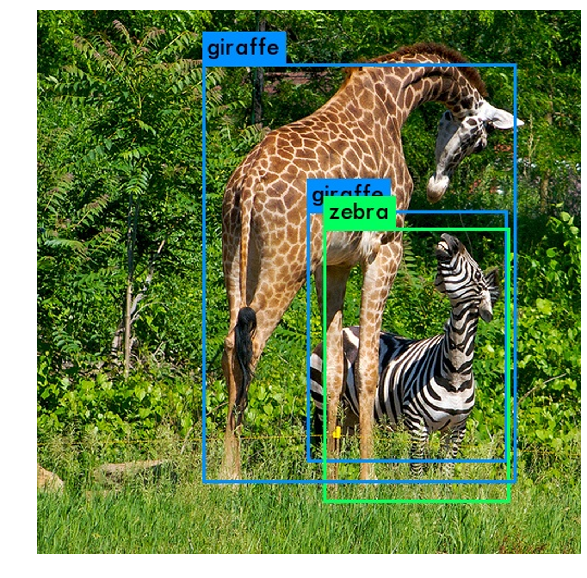

In [0]:

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
#Upload the video you want to use for object detection
%cd data
!ls
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

/content/darknet/data
9k.tree     eagle.jpg	 imagenet.labels.list	   scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  voc.names
coco.names  goal.txt	 labels
dog.jpg     horses.jpg	 person.jpg


Saving Mission_Impossible.mp4 to Mission_Impossible.mp4
saved file Mission_Impossible.mp4


In [0]:
# And finally run it! Please check if you have given the right video file name
%cd 
%cd darknet
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/Mission_Impossible.mp4 -i 0 -out_filename res.avi

/content
/content/darknet
Demo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->   

conv    512  3 x 3 / 1    26 x  26 x 256   ->    26 x  26 x 512 1.595 BF
  89 conv    256  1 x 1 / 1    26 x  26 x 512   ->    26 x  26 x 256 0.177 BF
  90 conv    512  3 x 3 / 1    26 x  26 x 256   ->    26 x  26 x 512 1.595 BF
  91 conv    256  1 x 1 / 1    26 x  26 x 512   ->    26 x  26 x 256 0.177 BF
  92 conv    512  3 x 3 / 1    26 x  26 x 256   ->    26 x  26 x 512 1.595 BF
  93 conv    255  1 x 1 / 1    26 x  26 x 512   ->    26 x  26 x 255 0.177 BF
  94 yolo
  95 route  91
  96 conv    128  1 x 1 / 1    26 x  26 x 256   ->    26 x  26 x 128 0.044 BF
  97 upsample            2x    26 x  26 x 128   ->    52 x  52 x 128
  98 route  97 36
  99 conv    128  1 x 1 / 1    52 x  52 x 384   ->    52 x  52 x 128 0.266 BF
 100 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256 1.595 BF
 101 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
 102 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256 1.595 BF
 103 conv    128  1 x 1 / 1    52 x


FPS:14.4
Objects:

cell phone: 61% 
tie: 67% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:15.5
Objects:

cell phone: 34% 
tie: 63% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.8
Objects:

cell phone: 33% 
tie: 70% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.5
Objects:

tie: 70% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:15.6
Objects:

tie: 29% 
person: 100% 
person: 90% 

 cvWriteFrame 

FPS:15.6
Objects:

tie: 33% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.8
Objects:

tennis racket: 38% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:15.1
Objects:

tie: 30% 
person: 99% 
person: 99% 

 cvWriteFrame 

FPS:15.5
Objects:

tie: 55% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:15.3
Objects:

person: 100% 
person: 99% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 100% 
person: 97% 

 cvWriteFrame 

FPS:12.8
Objects:

person: 100% 
person: 95% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 100% 
person: 99% 

 cvWriteFrame 

FPS:13.4
Objects:

aeroplane: 


FPS:13.2
Objects:

person: 26% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 51% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 35% 

 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.1
Objects:

horse: 38% 
person: 49% 

 cvWriteFrame 

FPS:14.3
Objects:

traffic light: 45% 
person: 81% 

 cvWriteFrame 

FPS:15.0
Objects:

traffic light: 37% 
person: 87% 

 cvWriteFrame 

FPS:14.9
Objects:

traffic light: 42% 
person: 89% 

 cvWriteFrame 

FPS:14.8
Objects:

traffic light: 28% 
person: 90% 

 cvWriteFrame 

FPS:14.4
Objects:

traffic light: 29% 
person: 91% 

 cvWriteFrame 

FPS:12.1
Objects:

traffic light: 34% 
person: 88% 

 cvWriteFrame 

FPS:15.6
Objects:

traffic light: 28% 
person: 90% 

 cvWriteFrame 

FPS:13.5
Objects:

traffic light: 36% 
person: 90% 

 cvWriteFrame 

FPS:15.3
Objects:

traffic light: 47% 
person: 88% 

 cvWriteFrame 

FPS:13.7
Objects:

traffic light: 48% 
person: 87% 

 cvWriteFrame 

FPS:15.6
Objects:

traffic li


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:15.7
Objects:


 cvWriteFrame 

FPS:12.7
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.0
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:15.4
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:15.3
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.0
Objects:


 cvWriteFrame 

FPS:15.5
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:15.5
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:15.6
Objects:


 cvWriteFrame 

FPS:11.9
Ob


FPS:14.9
Objects:


 cvWriteFrame 

FPS:15.7
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:12.7
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:13.5
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:13.2
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:15.4
Objects:

person: 100% 
person: 81% 
person: 27% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 100% 
person: 88% 
person: 78% 

 cvWriteFrame 

FPS:12.2
Objects:

person: 100% 
person: 79% 
person: 68% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 100% 
person: 78% 
person: 73% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 100% 
person: 46% 
person: 46% 

 cvWriteFrame 

FPS:15.4
Objects:

person: 100% 
person: 75% 
person: 59% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 100% 
person: 77% 
person: 73% 

 cvWriteFrame 



 cvWriteFrame 

FPS:14.9
Objects:

person: 83% 

 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:12.8
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.0
Objects:

horse: 42% 
person: 28% 

 cvWriteFrame 

FPS:15.3
Objects:

horse: 55% 
person: 61% 

 cvWriteFrame 

FPS:15.5
Objects:

horse: 72% 
person: 77% 
person: 37% 

 cvWriteFrame 

FPS:14.9
Objects:

horse: 96% 
person: 39% 

 cvWriteFrame 

FPS:12.9
Objects:

horse: 80% 
person: 85% 
person: 25% 

 cvWriteFrame 

FPS:13.2
Objects:

horse: 72% 
aeroplane: 31% 
person: 34% 

 cvWriteFrame 

FPS:15.3
Objects:

horse: 76% 
aeroplane: 70% 

 cvWriteFrame 

FPS:13.1
Objects:

aeroplane: 66% 
person: 78% 

 cvWriteFrame 

FPS:15.5
Objects:

horse: 48% 
aeroplane: 88% 
person: 80% 

 cvWriteFrame 

FPS:12.9
Objects:

horse: 31% 
aeroplane: 85% 
person: 91% 

 cvWriteFrame 

FPS:12.8
Objects:

horse: 38% 
aeroplane: 91% 
person: 80% 

 cvWriteFrame 

FPS:14.6
Objects:

per


FPS:12.7
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 94% 

 cvWriteFrame 

FPS:15.3
Objects:

car: 37% 
person: 100% 
person: 99% 
person: 99% 
person: 89% 

 cvWriteFrame 

FPS:15.3
Objects:

car: 32% 
car: 29% 
person: 100% 
person: 100% 
person: 98% 
person: 90% 

 cvWriteFrame 

FPS:15.0
Objects:

car: 58% 
car: 37% 
person: 100% 
person: 99% 
person: 99% 
person: 90% 

 cvWriteFrame 

FPS:12.1
Objects:

backpack: 26% 
car: 69% 
person: 100% 
person: 99% 
person: 97% 
person: 79% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 33% 
tie: 28% 
car: 79% 
person: 100% 
person: 99% 
person: 99% 
person: 86% 

 cvWriteFrame 

FPS:14.6
Objects:

tie: 26% 
tie: 25% 
car: 84% 
person: 100% 
person: 99% 
person: 99% 
person: 81% 

 cvWriteFrame 

FPS:12.3
Objects:

car: 59% 
person: 100% 
person: 99% 
person: 99% 
person: 75% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 
person: 99% 
person: 98% 
person: 44% 

 cvWriteFrame 

FPS:15.3
Objects:

person: 100% 
person: 100% 
perso


FPS:15.0
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:15.4
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:13.4
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.7
Objects:

person: 69% 

 cvWriteFrame 

FPS:15.0
Objects:

traffic light: 63% 
traffic light: 44% 

 cvWriteFrame 

FPS:13.1
Objects:

traffic light: 29% clock: 30% 
traffic light: 32% 

 cvWriteFrame 

FPS:12.9
Objects:

clock: 57% 
traffic light: 47% 

 cvWriteFrame 

FPS:13.0
Objects:

traffic light: 58% clock: 73% 

 cvWriteFrame 

FPS:12.9
Objects:

traffic light: 59% clock: 60% 

 cvWriteFrame 

FPS:14.3
Objects:

traffic light: 53% clock: 62% 

 cvWriteFrame 

FPS:13.0
Objects:

traffic light: 41% clock: 74% 

 cvWriteFrame 

FPS:15.5
Objects:




FPS:13.8
Objects:

bus: 34% 
person: 99% 
person: 81% 

 cvWriteFrame 

FPS:13.1
Objects:

bus: 46% 
person: 99% 
person: 91% 

 cvWriteFrame 

FPS:12.5
Objects:

bus: 51% 
person: 99% 
person: 92% 

 cvWriteFrame 

FPS:15.3
Objects:

bus: 57% 
person: 100% 
person: 96% 
person: 27% 

 cvWriteFrame 

FPS:12.7
Objects:

bus: 73% 
person: 99% 
person: 96% 

 cvWriteFrame 

FPS:14.5
Objects:

bus: 55% 
person: 99% 
person: 96% 

 cvWriteFrame 

FPS:14.3
Objects:

car: 28% bus: 43% 
person: 98% 
person: 95% 

 cvWriteFrame 

FPS:12.4
Objects:

car: 29% bus: 47% 
person: 99% 
person: 95% 

 cvWriteFrame 

FPS:13.1
Objects:

bus: 53% 
person: 99% 
person: 96% 

 cvWriteFrame 

FPS:13.7
Objects:

bus: 53% 
person: 99% 
person: 95% 

 cvWriteFrame 

FPS:13.6
Objects:

bus: 49% 
person: 99% 
person: 97% 

 cvWriteFrame 

FPS:14.7
Objects:

bus: 62% 
person: 99% 
person: 97% 

 cvWriteFrame 

FPS:12.5
Objects:

car: 28% bus: 52% 
person: 99% 
person: 94% 

 cvWriteFrame 

FPS:15.5
Objects:

car


FPS:13.6
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:13.2
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:15.3
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:13.7
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:15.3
Objects:


 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:15.2
Objects:

person: 52% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 60% 

 cvWriteFrame 

FPS:14.2
Objects:

person: 87% 

 cvW


FPS:14.2
Objects:

person: 97% 

 cvWriteFrame 

FPS:11.4
Objects:

person: 97% 

 cvWriteFrame 

FPS:13.3
Objects:

person: 96% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 96% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 94% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 94% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 94% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 95% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 95% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 94% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 96% 

 cvWriteFrame 

FPS:12.9
Objects:

person: 96% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 97% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 96% 

 cvWriteFrame 

FPS:15.5
Objects:

person: 95% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 96% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 96% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 95% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 96% 

 cvWriteFrame 

FPS:13.1
Objects:




 cvWriteFrame 

FPS:14.6
Objects:

motorbike: 96% 
motorbike: 94% 
car: 79% 
car: 43% 
car: 35% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.4
Objects:

truck: 46% 
motorbike: 88% 
motorbike: 81% 
car: 89% 
car: 58% 
car: 41% 
person: 100% 
person: 97% 
person: 33% 

 cvWriteFrame 

FPS:14.2
Objects:

motorbike: 98% 
motorbike: 88% 
person: 100% 
person: 96% 

 cvWriteFrame 

FPS:14.8
Objects:

motorbike: 88% 
motorbike: 31% 
person: 100% 
person: 98% 

 cvWriteFrame 

FPS:12.0
Objects:

motorbike: 91% 
motorbike: 55% 
motorbike: 40% 
motorbike: 32% 
person: 98% 
person: 97% 

 cvWriteFrame 

FPS:14.0
Objects:

backpack: 27% 
motorbike: 80% 
motorbike: 77% 
motorbike: 29% 
person: 96% 
person: 90% 

 cvWriteFrame 

FPS:11.5
Objects:

motorbike: 56% 
motorbike: 54% 
person: 97% 
person: 91% 

 cvWriteFrame 

FPS:14.7
Objects:

motorbike: 66% 
motorbike: 44% 
motorbike: 33% 
person: 97% 

 cvWriteFrame 

FPS:15.3
Objects:

motorbike: 71% 
motorbike: 68% 
motorbike: 48% 
person: 9


FPS:14.8
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:12.7
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:15.4
Objects:


 cvWriteFrame 

FPS:14.0
Objects:

person: 46% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 84% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 98% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 99% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 98% 

 cvWriteFrame 

FPS:11.8
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 96% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 95% 
person: 26% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 90% 
person: 45% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 93% 
person: 57% 
person: 30% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 90% 
person: 62% 
person: 25% 

 cvWriteFrame 

FPS:12.6
Objects:

cell phone: 26% 
person: 93% 
person: 54% 
person: 25% 

 cvWriteFrame 

FPS:13.3
Objects:

person

 cvWriteFrame 

FPS:12.8
Objects:

person: 94% 
person: 71% 
person: 35% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 94% 
person: 72% 
person: 29% 

 cvWriteFrame 

FPS:14.2
Objects:

person: 95% 
person: 71% 
person: 26% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 97% 
person: 69% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 95% 
person: 66% 
person: 25% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 95% 
person: 65% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 94% 
person: 63% 

 cvWriteFrame 

FPS:12.8
Objects:

person: 96% 
person: 60% 
person: 30% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 96% 
person: 60% 
person: 29% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 97% 
person: 61% 
person: 26% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 97% 
person: 61% 
person: 28% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 97% 
person: 61% 
person: 25% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 97% 
person: 60% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 97% 
person: 57% 
person: 28% 

 c


FPS:15.0
Objects:

cell phone: 25% 
person: 97% 
person: 64% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 97% 
person: 64% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 97% 
person: 65% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 97% 
person: 66% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 97% 
person: 63% 

 cvWriteFrame 

FPS:14.5
Objects:

cell phone: 26% 
person: 97% 
person: 62% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 97% 
person: 61% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 96% 
person: 63% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 96% 
person: 62% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 96% 
person: 62% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 93% 
person: 61% 
person: 35% 

 cvWriteFrame 

FPS:12.3
Objects:

person: 89% 
person: 64% 
person: 36% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 94% 
person: 66% 
person: 38% 

 cvWriteFrame 

FPS:13.6
Objects:

cell phone: 26% 
person: 94% 
person: 67% 
person: 36% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 9


FPS:14.8
Objects:

cell phone: 65% 
person: 96% 
person: 77% 
person: 54% 

 cvWriteFrame 

FPS:12.9
Objects:

cell phone: 66% 
person: 96% 
person: 78% 
person: 57% 

 cvWriteFrame 

FPS:13.1
Objects:

cell phone: 61% 
person: 95% 
person: 76% 
person: 56% 

 cvWriteFrame 

FPS:14.9
Objects:

cell phone: 41% 
cell phone: 29% 
person: 95% 
person: 83% 
person: 56% 

 cvWriteFrame 

FPS:12.4
Objects:

cell phone: 50% 
person: 94% 
person: 83% 
person: 59% 

 cvWriteFrame 

FPS:15.0
Objects:

cell phone: 49% 
person: 95% 
person: 84% 
person: 64% 

 cvWriteFrame 

FPS:13.7
Objects:

cell phone: 48% 
person: 96% 
person: 83% 
person: 64% 

 cvWriteFrame 

FPS:13.2
Objects:

cell phone: 53% 
person: 96% 
person: 82% 
person: 65% 

 cvWriteFrame 

FPS:13.0
Objects:

cell phone: 57% 
person: 96% 
person: 85% 
person: 65% 

 cvWriteFrame 

FPS:12.3
Objects:

cell phone: 50% 
person: 96% 
person: 86% 
person: 63% 

 cvWriteFrame 

FPS:14.1
Objects:

cell phone: 58% 
person: 97% 
person: 84% 



FPS:15.0
Objects:

person: 100% 
person: 84% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 85% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 
person: 84% 

 cvWriteFrame 

FPS:12.8
Objects:

person: 100% 
person: 83% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 
person: 85% 

 cvWriteFrame 

FPS:12.2
Objects:

person: 100% 
person: 86% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 100% 
person: 87% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 
person: 85% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 
person: 85% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 100% 
person: 86% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 100% 
person: 85% 

 cvWriteFrame 

FPS:12.8
Objects:

person: 100% 
person: 86% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 100% 
person: 86% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 
person: 84% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 
person: 85% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 100% 
person: 85% 

 cvWrit


FPS:15.3
Objects:


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:13.3
Objects:


 cvWriteFrame 

FPS:15.3
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:13.3
Objects:


 cvWriteFrame 

FPS:13.5
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:13.8
Objects:


 cvWriteFrame 

FPS:13.5
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:13.5
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWrit


FPS:12.4
Objects:

parking meter: 33% 
truck: 97% 
bus: 37% truck: 84% 
car: 96% 
car: 45% 

 cvWriteFrame 

FPS:12.6
Objects:

truck: 97% 
truck: 91% 
car: 100% 
car: 39% 

 cvWriteFrame 

FPS:15.5
Objects:

parking meter: 31% 
truck: 97% 
truck: 70% 
bus: 69% 
car: 98% 

 cvWriteFrame 

FPS:12.2
Objects:

parking meter: 44% 
truck: 97% 
truck: 64% 
bus: 46% 
car: 96% 

 cvWriteFrame 

FPS:13.8
Objects:

parking meter: 41% 
truck: 98% 
truck: 90% 
car: 91% 

 cvWriteFrame 

FPS:13.1
Objects:

parking meter: 54% 
truck: 98% 
truck: 84% 
car: 88% 

 cvWriteFrame 

FPS:12.4
Objects:

parking meter: 39% 
truck: 98% 
truck: 80% 
bus: 25% 

 cvWriteFrame 

FPS:14.7
Objects:

parking meter: 48% 
truck: 95% 
truck: 62% 
bus: 42% 

 cvWriteFrame 

FPS:12.7
Objects:

truck: 97% 
bus: 60% truck: 44% 

 cvWriteFrame 

FPS:15.0
Objects:

truck: 92% 
truck: 51% 
bus: 48% 

 cvWriteFrame 

FPS:12.9
Objects:

truck: 94% 
bus: 76% truck: 48% 

 cvWriteFrame 

FPS:14.9
Objects:

truck: 97% 
truck: 35%


 cvWriteFrame 

FPS:13.6
Objects:

truck: 98% 
car: 94% 
car: 37% 
person: 45% 

 cvWriteFrame 

FPS:13.0
Objects:

truck: 98% 
car: 90% 
car: 89% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 67% 

 cvWriteFrame 

FPS:15.2
Objects:

chair: 40% 
person: 95% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 86% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 42% 
person: 39% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 87% 

 cvWriteFrame 

FPS:12.7
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:15.2
Objects:

person: 30% 

 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:13.5
Objects:


 cvWriteFrame 

FPS:15.1
Objects:

person: 62% tvmonitor: 28% 
person: 30% 

 cvWriteFrame 

FPS:11.6
Objects:

tvmonitor: 29% 

 cvWriteFrame 

FPS:12.2
Objects:


 cvWriteFrame 

FPS:14.6
Objects:

person: 87% 

 cvWriteFrame 

FPS:13.3
Obje


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:12.4
Objects:


 cvWriteFrame 

FPS:12.8
Objects:


 cvWriteFrame 

FPS:11.8
Objects:

cell phone: 47% 
person: 99% 

 cvWriteFrame 

FPS:12.7
Objects:

cell phone: 87% 
person: 99% 

 cvWriteFrame 

FPS:13.2
Objects:

cell phone: 85% 
person: 100% 

 cvWriteFrame 

FPS:12.8
Objects:

cell phone: 72% 
person: 100% 

 cvWriteFrame 

FPS:14.6
Objects:

cell phone: 77% 
person: 99% 

 cvWriteFrame 

FPS:14.3
Objects:

cell phone: 89% 
person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

cell phone: 56% 
person: 100% 

 cvWriteFrame 

FPS:13.0
Objects:

cell phone: 44% 
person: 100% 

 cvWriteFrame 

FPS:13.4
Objects:

cell phone: 56% 
person: 100% 

 cvWriteFrame 

FPS:13.2
Objects:

cell phone: 59% 
person: 100% 

 cvWriteFrame 

FPS:14.4
Objects:

cell phone: 40% 
cell phone: 37% 
person: 100% 

 cvWriteFrame 

FPS:13.4
Objects:

cell phone: 42% 
person: 100% 

 cvWriteFrame 

FPS:14.0
Objects:

cell phone: 33% 
person: 100% 

 cvWri


FPS:15.3
Objects:

person: 98% 

 cvWriteFrame 

FPS:12.4
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 98% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 98% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 98% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 98% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 98% 

 cvWriteFrame 

FPS:11.8
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 99% 

 cvWriteFrame 

FPS:15.2
Objects:

bench: 28% 
person: 99% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 97% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 94% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 81% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 96% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 96% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 88% 

 cvWriteFrame 

FPS:14.0
Objects:

dog: 41% 
person: 59% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 49% 

 cvWriteFrame


FPS:12.6
Objects:

person: 100% 
person: 96% 
person: 94% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 100% 
person: 95% 
person: 94% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 100% 
person: 94% 
person: 90% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 100% 
person: 96% 
person: 82% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 94% 
person: 84% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 89% 
person: 87% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 
person: 91% 
person: 89% 
person: 39% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 92% 
person: 86% 
person: 36% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 100% 
person: 93% 
person: 77% 
person: 50% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 
person: 93% 
person: 87% 
person: 48% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 100% 
person: 94% 
person: 88% 
person: 48% 

 cvWriteFrame 

FPS:14.8
Objects:

tie: 99% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.0
Objects:

tie: 9


FPS:12.2
Objects:

tie: 43% 
train: 32% 
person: 100% 
person: 95% 

 cvWriteFrame 

FPS:13.3
Objects:

tie: 33% 
train: 32% 
person: 100% 
person: 93% 

 cvWriteFrame 

FPS:13.9
Objects:

tie: 34% 
train: 53% 
person: 100% 
person: 95% 

 cvWriteFrame 

FPS:14.0
Objects:

tie: 41% 
train: 38% 
person: 100% 
person: 95% 

 cvWriteFrame 

FPS:15.2
Objects:

tie: 65% 
train: 27% 
person: 100% 
person: 93% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 100% 
person: 96% 

 cvWriteFrame 

FPS:12.9
Objects:

tie: 37% 
train: 27% 
person: 100% 
person: 97% 

 cvWriteFrame 

FPS:14.0
Objects:

tie: 73% 
train: 27% 
person: 100% 
person: 96% 

 cvWriteFrame 

FPS:14.0
Objects:

tie: 50% 
person: 100% 
person: 98% 

 cvWriteFrame 

FPS:11.9
Objects:

tie: 65% 
train: 32% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.6
Objects:

tie: 75% 
train: 29% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.6
Objects:

tie: 88% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.9
Objects:

tie: 7


FPS:14.8
Objects:

tie: 67% 
person: 98% 
person: 98% 
person: 96% 

 cvWriteFrame 

FPS:14.5
Objects:

tie: 67% 
person: 98% 
person: 98% 
person: 95% 

 cvWriteFrame 

FPS:12.5
Objects:

tie: 65% 
person: 98% 
person: 97% 
person: 95% 

 cvWriteFrame 

FPS:12.5
Objects:

tie: 64% 
person: 98% 
person: 97% 
person: 95% 

 cvWriteFrame 

FPS:14.5
Objects:

tie: 66% 
person: 98% 
person: 97% 
person: 94% 

 cvWriteFrame 

FPS:14.2
Objects:

tie: 67% 
person: 98% 
person: 97% 
person: 95% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 65% 
person: 96% 
person: 96% 
person: 95% 

 cvWriteFrame 

FPS:13.8
Objects:

tie: 61% 
person: 96% 
person: 96% 
person: 95% 

 cvWriteFrame 

FPS:13.0
Objects:

tie: 60% 
person: 97% 
person: 96% 
person: 96% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 63% 
person: 97% 
person: 97% 
person: 96% 

 cvWriteFrame 

FPS:14.0
Objects:

tie: 64% 
person: 98% 
person: 97% 
person: 96% 

 cvWriteFrame 

FPS:13.2
Objects:

tie: 64% 
person: 98% 
person: 97% 
person: 9


FPS:12.2
Objects:

person: 100% 
person: 51% 

 cvWriteFrame 

FPS:15.0
Objects:

scissors: 28% 
person: 100% 
person: 51% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 100% 
person: 51% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 100% 
person: 58% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 
person: 54% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 
person: 47% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 
person: 48% 

 cvWriteFrame 

FPS:11.9
Objects:

person: 100% 
person: 44% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 
person: 41% 

 cvWriteFrame 

FPS:12.4
Objects:

person: 100% 
person: 46% 
person: 30% 
person: 29% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 
person: 44% 
person: 28% 

 cvWriteFrame 

FPS:12.9
Objects:

tie: 77% 
person: 95% 
person: 91% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 97% 
person: 93% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 98% 
person: 89% 

 cvWriteFrame 

FPS:12.3
Objects:

person: 99% 
person: 90% 

 cvWriteFr


FPS:13.3
Objects:

tie: 99% 
person: 100% 
person: 86% 

 cvWriteFrame 

FPS:12.9
Objects:

tie: 98% 
person: 100% 
person: 95% 

 cvWriteFrame 

FPS:13.1
Objects:

tie: 98% 
person: 100% 
person: 84% 

 cvWriteFrame 

FPS:13.9
Objects:

tie: 97% 
person: 100% 
person: 60% 

 cvWriteFrame 

FPS:15.1
Objects:

tie: 96% 
person: 100% 
person: 63% 

 cvWriteFrame 

FPS:13.5
Objects:

chair: 49% 
tie: 92% 
person: 100% 
person: 63% 
person: 39% 

 cvWriteFrame 

FPS:14.8
Objects:

tie: 82% 
person: 100% 
person: 90% 

 cvWriteFrame 

FPS:14.7
Objects:

tie: 96% 
person: 100% 
person: 95% 

 cvWriteFrame 

FPS:14.2
Objects:

tie: 96% 
person: 100% 
person: 89% 
person: 59% 

 cvWriteFrame 

FPS:14.4
Objects:

tie: 96% 
person: 100% 
person: 85% 

 cvWriteFrame 

FPS:12.9
Objects:

tie: 99% 
person: 100% 
person: 91% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 94% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 92% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.9
Ob


FPS:12.5
Objects:

tie: 93% 
person: 100% 
person: 98% 
person: 42% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 91% 
person: 100% 
person: 99% 
person: 61% 

 cvWriteFrame 

FPS:14.7
Objects:

tie: 97% 
person: 100% 
person: 99% 
person: 49% 

 cvWriteFrame 

FPS:12.3
Objects:

tie: 93% 
person: 100% 
person: 98% 
person: 44% 

 cvWriteFrame 

FPS:15.0
Objects:

tie: 93% 
person: 100% 
person: 97% 

 cvWriteFrame 

FPS:12.4
Objects:

tie: 85% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:13.0
Objects:

cell phone: 26% 
tie: 49% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.0
Objects:

cell phone: 47% 
tie: 76% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.2
Objects:

tie: 50% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:15.2
Objects:

tie: 83% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.8
Objects:

tie: 75% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:15.1
Objects:

tie: 90% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.8
Objects:

cell phone: 30% 
t


FPS:15.2
Objects:

tie: 47% 
person: 96% 
person: 25% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 77% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 99% 
person: 36% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 99% 
person: 59% 

 cvWriteFrame 

FPS:12.9
Objects:

person: 97% 
person: 40% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 98% 

 cvWriteFrame 

FPS:12.9
Objects:

person: 95% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 96% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 96% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 98% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 36% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 92% 

 cvWriteFrame 

FPS:12.0
Objects:

person: 94% 
person: 36% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 100% 
person: 89% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 


FPS:15.1
Objects:

person: 99% 
person: 82% 

 cvWriteFrame 

FPS:12.7
Objects:

backpack: 40% 
person: 99% 
person: 94% 

 cvWriteFrame 

FPS:14.5
Objects:

backpack: 38% 
person: 99% 
person: 69% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 98% 
person: 91% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 97% 
person: 49% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 85% 

 cvWriteFrame 

FPS:15.2
Objects:

sink: 71% 
bird: 27% 
person: 98% 

 cvWriteFrame 

FPS:15.2
Objects:

sink: 40% 
person: 100% 

 cvWriteFrame 

FPS:11.8
Objects:

sink: 31% 
keyboard: 40% 
person: 98% 

 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:15.3
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:13.2
Objects:


 cvWriteFrame 

FPS:12.8
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:15.3
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:13.


 cvWriteFrame 

FPS:12.7
Objects:

tie: 99% 
person: 98% 

 cvWriteFrame 

FPS:13.0
Objects:

tie: 99% 
person: 99% 

 cvWriteFrame 

FPS:13.2
Objects:

car: 28% 
person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

car: 28% 
person: 100% 

 cvWriteFrame 

FPS:14.1
Objects:

car: 30% 
person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

car: 29% 
person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

car: 34% 
person: 100% 

 cvWriteFrame 

FPS:12.1
Objects:

car: 34% 
person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

car: 30% 
person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

car: 29% 
person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.5
Objects:

car: 29% 
person: 100% 

 cvWriteFrame 

FPS:11.5
Objects:

car: 30% 
person: 100% 

 cvWriteFrame 

FPS:13.0
Objects:

car: 28% 
person: 100% 

 cvWriteFrame 

FPS:12.4
Objects:

car: 36% 
person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

car: 32% 
person: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

car: 34% 
person


FPS:12.9
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:13.3
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:15.1
Objects:

aeroplane: 34% 

 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:13.1
Objects:


 cvWriteFrame 

FPS:13.1
Objects:

aeroplane: 36% 

 cvWriteFrame 

FPS:13.6
Objects:

aeroplane: 31% 

 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:13.3
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:13.1
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFra


FPS:14.7
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:12.7
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:13.8
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.7
Objects:

boat: 34% 
person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

boat: 27% 
person: 100% 
person: 31% 

 cvWriteFrame 

FPS:14.2
Objects:

boat: 29% 
person: 100% 
person: 32% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 
person: 33% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 
person: 43% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 
person: 46% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 100% 
person: 26% 

 cvWriteFrame 

FPS:14


FPS:12.2
Objects:

person: 100% 
person: 85% 
person: 52% 
person: 29% 

 cvWriteFrame 

FPS:14.8
Objects:

train: 35% 
person: 100% 
person: 85% 
person: 39% 

 cvWriteFrame 

FPS:15.1
Objects:

train: 55% 
person: 100% 
person: 86% 
person: 47% 
person: 33% 
person: 31% 

 cvWriteFrame 

FPS:12.5
Objects:

train: 56% 
person: 100% 
person: 88% 
person: 60% 
person: 32% 

 cvWriteFrame 

FPS:13.1
Objects:

train: 38% 
person: 100% 
person: 79% 
person: 63% 
person: 27% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 97% 
person: 92% 

 cvWriteFrame 

FPS:12.2
Objects:

person: 98% 
person: 87% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 92% 
person: 84% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 95% 
person: 78% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 88% 
person: 80% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 93% 
person: 91% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 95% 
person: 89% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 90% 
person: 79% 
person: 31% 

 cvWriteFrame


 cvWriteFrame 

FPS:14.3
Objects:

person: 100% 
person: 78% 

 cvWriteFrame 

FPS:11.8
Objects:

person: 100% 
person: 80% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 100% 
person: 73% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 
person: 70% 

 cvWriteFrame 

FPS:12.8
Objects:

person: 100% 
person: 73% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 100% 
person: 61% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 
person: 54% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.4
Objects:

person: 100% 
person: 26% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.2
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100


FPS:13.2
Objects:

tie: 28% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:13.9
Objects:

tie: 27% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 100% 
person: 100% 

 cvWriteFrame 

FPS:13.9
Objects:

tie: 28% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

tie: 32% 
tie: 29% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:14.6
Objects:

tvmonitor: 26% 
person: 100% 
person: 100% 
person: 98% 
person: 73% 

 cvWriteFrame 

FPS:13.2
Objects:

tvmonitor: 31% 
person: 100% 
person: 100% 
person: 98% 
person: 69% 

 cvWriteFrame 

FPS:14.3
Objects:

tvmonitor: 32% 
person: 100% 
person: 100% 
person: 98% 
person: 62% 

 cvWriteFrame 

FPS:14.6
Objects:

tvmonitor: 35% 
person: 100% 
person: 100% 
person: 98% 
person: 61% 

 cvWriteFrame 

FPS:12.8
Objects:

tvmonitor: 41% 
person: 100% 
person: 100% 
person: 98% 
person: 48% 

 cvWriteFrame 

FPS:14.7
Objects:

tvmonitor: 46% 
person: 100% 
person: 100% 
person: 98% 
person: 52% 

 cvWriteF


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:12.8
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:12.0
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:13.1
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:13.0
Objects:

tie: 82% 
tie: 68% 
tie: 36% 
tie: 32% 
person: 99% 
person: 97% 
person: 97% 
person: 94% 
person: 90% 
person: 83% 
person: 79% 
person: 78% 
person: 78% 
person: 73% 
person: 68% 
person: 68% 
person: 66% 
person: 59% 
person: 45% 
person: 36% 
person: 34% 
person: 31% 
person: 31% 
person: 26% 

 cvWriteFrame 

FPS:14.5
Objects:

tie: 87% 
tie: 72% 
tie: 35% 
person: 99% 
person: 98% 
person: 97% 
person: 95% 
person: 94% 
person: 89% 
person: 83% 
person: 76% 
person: 70% 
person: 65% 
person: 64% 
person: 61% 
person: 57% 
person: 56% 
person: 44% 
person: 40% 
person: 35% 
person: 31% 
pers


 cvWriteFrame 

FPS:14.8
Objects:

tie: 59% 
tie: 57% 
person: 99% 
person: 97% 
person: 91% 
person: 91% 
person: 89% 
person: 83% 
person: 81% 
person: 66% 
person: 64% 
person: 54% 
person: 45% 
person: 27% 

 cvWriteFrame 

FPS:13.6
Objects:

tie: 70% 
tie: 55% 
person: 99% 
person: 97% 
person: 93% 
person: 92% 
person: 90% 
person: 87% 
person: 87% 
person: 70% 
person: 60% 
person: 52% 
person: 50% 
person: 49% 
person: 41% 
person: 34% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 66% 
tie: 53% 
person: 99% 
person: 97% 
person: 97% 
person: 95% 
person: 90% 
person: 88% 
person: 85% 
person: 79% 
person: 70% 
person: 67% 
person: 47% 
person: 42% 
person: 38% 
person: 26% 

 cvWriteFrame 

FPS:14.5
Objects:

tie: 82% 
tie: 48% 
person: 100% 
person: 98% 
person: 96% 
person: 94% 
person: 88% 
person: 88% 
person: 87% 
person: 77% 
person: 77% 
person: 48% 
person: 35% 
person: 34% 
person: 26% 

 cvWriteFrame 

FPS:12.5
Objects:

tie: 80% 
tie: 29% 
person: 100% 
person: 98% 
per


 cvWriteFrame 

FPS:14.6
Objects:

person: 93% 
person: 31% 

 cvWriteFrame 

FPS:11.9
Objects:

person: 93% 
person: 26% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 92% 
person: 26% 

 cvWriteFrame 

FPS:12.0
Objects:

person: 89% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 92% 
person: 27% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 94% 
person: 35% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 91% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 91% 

 cvWriteFrame 

FPS:15.3
Objects:

person: 94% 
person: 27% 

 cvWriteFrame 

FPS:12.8
Objects:

person: 95% 
person: 33% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 97% 
person: 34% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 94% 
person: 39% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 90% 
person: 32% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 91% 
person: 32% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 93% 

 cvWriteFrame 

FPS:13.8
Objects:

tie: 35% 
person: 95% 

 cvWriteFrame 

FPS:14.4
Objects:

tie: 59% 
person: 96% 

 cv


FPS:13.5
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.0
Objects:

tie: 45% 
person: 100% 
person: 100% 
person: 100% 
person: 98% 
person: 98% 
person: 96% 

 cvWriteFrame 

FPS:13.2
Objects:

tie: 44% 
person: 100% 
person: 100% 
person: 99% 
person: 99% 
person: 98% 
person: 97% 

 cvWriteFrame 

FPS:12.0
Objects:

tie: 32% 
person: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 97% 
person: 96% 

 cvWriteFrame 

FPS:12.3
Objects:

tie: 36% 
person: 100% 
person: 100% 
person: 100% 
person: 98% 
person: 97% 
person: 95% 

 cvWriteFrame 

FPS:12.7
Objects:

tie: 34% 
person: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 98% 
person: 96% 

 cvWriteFrame 

FPS:13.0
Objects:

tie: 42% 
person: 100% 
person: 100% 
person: 99% 
person: 97% 
person: 96% 
person: 95% 

 cvWrit


FPS:13.5
Objects:


 cvWriteFrame 

FPS:15.1
Objects:

person: 30% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 60% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 82% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 67% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 65% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 97% 
person: 89% 
person: 83% 
person: 42% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 98% 
person: 88% 
person: 80% 
person: 38% 

 cvWriteFrame 

FPS:13.3
Objects:

person: 99% 
person: 90% 
person: 82% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 99% 
person: 94% 
person: 79% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 99% 
person: 95% 
person: 78% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 99% 
person: 96% 
person: 81% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 99% 
person: 99% 
person: 84% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 99% 
person: 99% 
person: 82% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 99% 
person: 99% 
person: 84% 

 cvWriteFrame 

FPS:12.8
Objects:


FPS:14.5
Objects:

person: 28% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 29% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 34% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 42% 

 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.3
Objects:

person: 55% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 27% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 62% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 65% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 38% 

 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:12.7
Objects:


 cvWriteFrame 

FPS:13.9
Objects:

person: 31% 

 cvWriteFrame 

FPS:11.8
Objects:


 cvWriteFrame 

FPS:13.3
Objects:

person: 34% 

 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:13.8
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:15.0
Objects:

person: 37% 

 cvWriteFrame 

FPS:12.4
Object


 cvWriteFrame 

FPS:13.7
Objects:

motorbike: 100% 
car: 100% 
car: 99% 
car: 99% 
car: 97% 
car: 94% 
car: 92% 
car: 69% 
car: 32% 
person: 99% 
person: 62% 

 cvWriteFrame 

FPS:14.8
Objects:

motorbike: 98% 
car: 99% 
car: 97% 
car: 95% 
car: 92% 
car: 91% 
car: 84% 
car: 64% 
car: 49% 
person: 95% 
person: 79% 

 cvWriteFrame 

FPS:14.8
Objects:

motorbike: 96% 
motorbike: 42% 
car: 99% 
car: 99% 
car: 98% 
car: 97% 
car: 76% 
car: 71% 
car: 66% 
car: 42% 
car: 35% 
person: 95% 
person: 93% 

 cvWriteFrame 

FPS:12.7
Objects:

motorbike: 99% 
motorbike: 93% 
car: 100% 
car: 100% 
car: 98% 
car: 98% 
car: 61% 
car: 49% 
car: 44% 
person: 97% 
person: 97% 

 cvWriteFrame 

FPS:12.3
Objects:

motorbike: 98% 
motorbike: 96% 
car: 100% 
car: 99% 
car: 98% 
car: 98% 
car: 92% 
car: 82% 
car: 81% 
person: 98% 
person: 88% 
person: 49% 

 cvWriteFrame 

FPS:13.0
Objects:

motorbike: 99% 
motorbike: 96% 
car: 99% 
car: 99% 
car: 99% 
car: 97% 
car: 95% 
car: 84% 
car: 39% 
person: 99% 
per


 cvWriteFrame 

FPS:15.1
Objects:

person: 61% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 89% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 86% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 36% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 57% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 99% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 72% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 79% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 98% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 88% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 56% 

 cvWriteFrame 

FPS:12.9
Objects:

person: 65% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 89% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 58% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 99% 
person: 96% 
person: 67% 

 cvWriteFrame 

FPS:12.4
Objects:

chair: 68% 
person: 99% 
person: 98% 
person: 38% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 98% 
person: 94% 
person: 26% 

 cvWriteFrame 

FPS:14.2
O


FPS:12.4
Objects:

laptop: 82% cell phone: 42% 
chair: 39% 
person: 99% 

 cvWriteFrame 

FPS:14.9
Objects:

laptop: 73% cell phone: 39% 
chair: 27% 
person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

cell phone: 85% 
person: 99% 

 cvWriteFrame 

FPS:13.2
Objects:

cell phone: 85% 
person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

tvmonitor: 85% 
tvmonitor: 46% 
cup: 48% 
bottle: 72% 
person: 100% 
person: 94% 
person: 86% 
person: 71% 
person: 67% 
person: 30% 

 cvWriteFrame 

FPS:14.7
Objects:

tvmonitor: 81% 
tvmonitor: 49% 
bowl: 25% 
cup: 48% 
person: 100% 
person: 88% 
person: 74% 
person: 72% 
person: 37% 
person: 32% 
person: 27% 
person: 26% 

 cvWriteFrame 

FPS:12.5
Objects:

tvmonitor: 93% 
tvmonitor: 91% 
cup: 31% 
person: 100% 
person: 95% 
person: 73% 
person: 42% 
person: 36% 
person: 29% 

 cvWriteFrame 

FPS:14.5
Objects:

tvmonitor: 78% 
tvmonitor: 49% 
cup: 40% 
person: 100% 
person: 87% 
person: 86% 
person: 55% 
person: 36% 

 cvWriteFrame 

FPS:14.6
Objects:

t


FPS:15.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:13.7
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:13.4
Objects:


 cvWriteFrame 

FPS:14.4
Objects:

pottedplant: 33% 

 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 98% 

 cvWriteFrame 

FPS:11.9
Objects:

person: 97% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 95% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 98% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 99% 

 cvWriteFra


FPS:15.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.2
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 100% 

 cvWriteFrame 



FPS:12.4
Objects:

chair: 43% 
chair: 29% 
bottle: 29% 
person: 100% 
person: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 99% 
person: 98% 
person: 95% 
person: 91% 
person: 78% 
person: 73% 
person: 72% 
person: 70% 
person: 60% 
person: 55% 
person: 48% 
person: 47% 
person: 43% 
person: 36% 
person: 36% 
person: 30% 
person: 29% 
person: 29% 
person: 27% 
person: 25% 

 cvWriteFrame 

FPS:14.3
Objects:

chair: 44% 
chair: 29% 
bottle: 28% 
person: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 99% 
person: 99% 
person: 98% 
person: 96% 
person: 91% 
person: 78% 
person: 73% 
person: 73% 
person: 72% 
person: 61% 
person: 54% 
person: 47% 
person: 46% 
person: 42% 
person: 35% 
person: 35% 
person: 29% 
person: 29% 
person: 28% 
person: 28% 
person: 26% 

 cvWriteFrame 

FPS:12.7
Objects:

chair: 43% 
chair: 29% 
bottle: 26% 
person: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 99% 
person: 99% 
person: 98% 
person: 96% 
person: 92% 
person: 77% 
person:


FPS:12.0
Objects:

chair: 42% 
chair: 29% 
chair: 28% 
chair: 27% 
person: 100% 
person: 100% 
person: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 98% 
person: 96% 
person: 75% 
person: 72% 
person: 69% 
person: 68% 
person: 60% 
person: 59% 
person: 51% 
person: 48% 
person: 43% 
person: 38% 
person: 37% 
person: 31% 
person: 30% 
person: 29% 
person: 28% 
person: 26% 
person: 26% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.3
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.5
Objects:

per


 cvWriteFrame 

FPS:12.6
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 96% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 98% 

 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:13.9
Objects:

person: 53% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 97% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 53% 

 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:13.5
Objects:

person: 53% 

 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:12.7
Objects:

person: 89% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 76% 

 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 



 cvWriteFrame 

FPS:13.6
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:13.1
Objects:


 cvWriteFrame 

FPS:15.3
Objects:

person: 36% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 43% 

 cvWriteFrame 

FPS:11.7
Objects:

person: 47% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 51% 
person: 32% 
person: 28% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 48% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 49% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 45% 
person: 36% 

 cvWriteFrame 

FPS:12.9
Objects:

person: 37% 
person: 29% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 46% 
person: 28% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 38% 
person: 36% 
person: 31% 
person: 26% 

 cvWriteFrame 

FPS:12.9
Objects:

person: 27% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 33% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 35% 
person: 27% 

 cvWriteFrame 

FPS:13.1
Objects:


 cvWriteFrame 

FPS:12.7
Objects:

stop sign: 31% 
traffic light: 25% 
truck: 32% 
truck: 28% 
motorb


FPS:12.2
Objects:

traffic light: 94% 
traffic light: 83% 
traffic light: 71% 
traffic light: 71% 
traffic light: 59% 
traffic light: 34% 
traffic light: 25% 
motorbike: 98% 
motorbike: 95% 
person: 45% 
car: 97% 
car: 92% 
car: 88% 
car: 83% 
car: 26% 
person: 93% 
person: 89% 
person: 77% 
person: 28% 

 cvWriteFrame 

FPS:12.6
Objects:

traffic light: 95% 
traffic light: 77% 
traffic light: 48% 
traffic light: 45% 
traffic light: 41% 
traffic light: 36% 
traffic light: 34% 
traffic light: 30% 
motorbike: 98% 
motorbike: 98% 
person: 29% 
car: 95% 
car: 93% 
car: 84% 
car: 80% 
person: 93% 
person: 84% 
person: 69% 
person: 63% 
person: 27% 

 cvWriteFrame 

FPS:11.8
Objects:

traffic light: 83% 
traffic light: 63% 
traffic light: 45% 
traffic light: 45% 
traffic light: 41% 
motorbike: 98% 
motorbike: 95% 
person: 46% 
car: 97% 
car: 89% 
car: 71% 
car: 63% 
person: 87% 
person: 84% 
person: 72% 
person: 70% 
person: 37% 

 cvWriteFrame 

FPS:14.0
Objects:

stop sign: 50% 
traffic l


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:14.2
Objects:

motorbike: 100% 
car: 73% 
car: 30% 
person: 100% 

 cvWriteFrame 

FPS:14.6
Objects:

motorbike: 100% 
car: 98% 
car: 49% 
person: 100% 

 cvWriteFrame 

FPS:12.8
Objects:

motorbike: 99% 
car: 98% 
car: 40% 
person: 99% 

 cvWriteFrame 

FPS:13.4
Objects:

truck: 28% 
motorbike: 100% 
car: 96% 
car: 94% 
person: 100% 

 cvWriteFrame 

FPS:14.3
Objects:

motorbike: 100% 
car: 98% 
person: 98% 

 cvWriteFrame 

FPS:13.2
Objects:

car: 61% truck: 29% 
motorbike: 98% 
car: 31% 
person: 73% 

 cvWriteFrame 

FPS:13.6
Objects:

cell phone: 28% 
car: 48% 
car: 44% 
bicycle: 29% 
person: 100% 

 cvWriteFrame 

FPS:14.6
Objects:

cell phone: 32% 
car: 62% 
person: 99% 

 cvWriteFrame 

FPS:12.3
Objects:

person: 90% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 63% 

 cvWriteFrame 

FPS:14.8
Objects:

car: 60% truck: 55% 
car: 95% 
person: 90% 
person: 62% 

 cvWriteFrame 

FPS:14.9
Objects:

traffic light: 26% 
bus: 93% 



 cvWriteFrame 

FPS:14.7
Objects:

traffic light: 61% 
car: 99% 
person: 41% 

 cvWriteFrame 

FPS:13.8
Objects:

traffic light: 47% 
car: 97% 
person: 29% 
person: 26% 

 cvWriteFrame 

FPS:14.6
Objects:

traffic light: 70% 
car: 98% 

 cvWriteFrame 

FPS:14.9
Objects:

traffic light: 63% 
car: 99% 

 cvWriteFrame 

FPS:15.0
Objects:

traffic light: 60% 
car: 94% 
person: 29% 

 cvWriteFrame 

FPS:14.0
Objects:

umbrella: 42% 
traffic light: 39% 
car: 97% 
car: 66% 
car: 48% 

 cvWriteFrame 

FPS:14.8
Objects:

umbrella: 50% 
traffic light: 27% 
car: 99% 
car: 50% 
person: 35% 

 cvWriteFrame 

FPS:12.3
Objects:

umbrella: 57% 
traffic light: 41% 
car: 96% 
car: 71% 
person: 28% 

 cvWriteFrame 

FPS:15.1
Objects:

umbrella: 30% 
traffic light: 42% 
car: 93% 

 cvWriteFrame 

FPS:15.1
Objects:

traffic light: 68% 
car: 97% 
car: 88% 

 cvWriteFrame 

FPS:13.4
Objects:

car: 97% 

 cvWriteFrame 

FPS:13.0
Objects:

umbrella: 47% 
traffic light: 45% 
car: 95% 
person: 42% 

 cvWriteFra


 cvWriteFrame 

FPS:14.8
Objects:

car: 32% 
person: 98% 

 cvWriteFrame 

FPS:12.5
Objects:

car: 30% 
person: 99% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 100% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:13.3
Objects:

person: 100% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 100% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:12.2
Objects:

person: 100% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 100% 
person: 99% 
person: 97% 

 cvWriteFrame 

FPS:12.3
Objects:

person: 100% 
person: 99% 
person: 97% 

 cvWriteFrame 

FPS:15.5
Objects:

person: 100% 
person: 99% 
person: 97% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 99% 
person: 97% 

 cvWriteFrame 

FPS:11.7
Objects:

person: 100% 
person: 99% 
person: 97% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 100% 
person: 99% 
person: 97% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 100% 
person: 99% 
person: 96% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 10


FPS:13.1
Objects:

person: 94% 
person: 86% 
person: 64% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 90% 
person: 85% 
person: 56% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 94% 
person: 66% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 99% 
person: 26% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 98% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 98% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 96% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 91% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 87% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 90% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 89% 

 cvWriteFrame 

FPS:14.2
Objects:

tie: 96% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:14.5
Objects:

tie: 98% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 97% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:12.1
Objects:

tie: 95% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:12.0
Objects:

tie: 79% 
person: 100% 
person: 100% 

 cvWriteFrame 

FPS:12.6
Obj


FPS:14.5
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:13.8
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:13.8
Objects:


 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:13.6
Objects:


 cvWriteFrame 

FPS:12.1
Objects:


 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:13.6
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.8
Objects:

person: 40% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 97% 
person: 25% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 94% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 99% 

 cvWriteFrame 


FPS:11.6
Objects:

tie: 80% 
person: 99% 
person: 99% 

 cvWriteFrame 

FPS:12.1
Objects:

tie: 71% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:12.2
Objects:

tie: 62% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 73% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:13.7
Objects:

tie: 80% 
person: 100% 
person: 98% 

 cvWriteFrame 

FPS:12.5
Objects:

tie: 88% 
person: 100% 
person: 98% 

 cvWriteFrame 

FPS:14.0
Objects:

tie: 92% 
person: 100% 
person: 98% 

 cvWriteFrame 

FPS:14.1
Objects:

tie: 92% 
person: 100% 
person: 98% 

 cvWriteFrame 

FPS:14.7
Objects:

tie: 78% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:14.8
Objects:

tie: 61% 
person: 99% 
person: 99% 

 cvWriteFrame 

FPS:14.2
Objects:

tie: 54% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 74% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.3
Objects:

tie: 80% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:13.6
Objects:

tie: 65% 
person: 99% 
person: 98% 




FPS:14.2
Objects:

stop sign: 77% 
truck: 88% 
bicycle: 90% 
person: 81% 

 cvWriteFrame 

FPS:11.8
Objects:

stop sign: 64% 
truck: 90% 
car: 28% 
bicycle: 89% 
person: 68% 

 cvWriteFrame 

FPS:14.4
Objects:

stop sign: 72% 
truck: 83% 
car: 63% 
bicycle: 83% 
person: 27% 

 cvWriteFrame 

FPS:13.9
Objects:

stop sign: 68% 
truck: 97% 
bicycle: 86% 
person: 69% 

 cvWriteFrame 

FPS:14.8
Objects:

stop sign: 54% 
truck: 91% 
car: 55% 
bicycle: 88% 
bicycle: 50% 
person: 41% 

 cvWriteFrame 

FPS:15.0
Objects:

stop sign: 54% 
truck: 98% 
bicycle: 80% 
person: 38% 

 cvWriteFrame 

FPS:14.0
Objects:

stop sign: 50% 
truck: 96% 
car: 49% 
bicycle: 72% 
person: 52% 

 cvWriteFrame 

FPS:12.3
Objects:

stop sign: 45% 
truck: 89% 
car: 60% 
bicycle: 65% 

 cvWriteFrame 

FPS:14.3
Objects:

stop sign: 28% 
truck: 87% 
car: 90% 
bicycle: 55% 
person: 58% 

 cvWriteFrame 

FPS:14.2
Objects:

truck: 84% 
car: 86% 
person: 70% 

 cvWriteFrame 

FPS:15.0
Objects:

stop sign: 49% 
truck: 92% 
c


FPS:13.6
Objects:

person: 100% 
person: 90% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 100% 
person: 91% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 100% 
person: 92% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 100% 
person: 91% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 
person: 92% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 100% 
person: 90% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 
person: 90% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 100% 
person: 89% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 100% 
person: 89% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 99% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 97% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 100% 

 cvWr


 cvWriteFrame 

FPS:13.9
Objects:

cell phone: 63% 
person: 51% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 74% 

 cvWriteFrame 

FPS:14.4
Objects:

car: 66% 
person: 37% 

 cvWriteFrame 

FPS:14.6
Objects:

car: 83% 
person: 27% 

 cvWriteFrame 

FPS:14.4
Objects:

car: 70% 
person: 36% 
person: 30% 

 cvWriteFrame 

FPS:14.1
Objects:

car: 73% 
person: 39% 

 cvWriteFrame 

FPS:14.9
Objects:

car: 72% 
person: 63% 

 cvWriteFrame 

FPS:13.5
Objects:

car: 73% 
person: 67% 

 cvWriteFrame 

FPS:13.5
Objects:


 cvWriteFrame 

FPS:14.0
Objects:

person: 31% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 81% 
person: 29% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 99% 
person: 93% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 98% 
person: 96% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 98% 
person: 95% 

 cvWriteFrame 

FPS:14.2
Objects:

person: 98% 
person: 96% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 95% 
person: 94% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 95% 
person: 63% 


 cvWriteFrame 

FPS:13.7
Objects:

bed: 28% 
chair: 40% 
person: 99% 
person: 98% 
person: 94% 

 cvWriteFrame 

FPS:14.3
Objects:

chair: 56% 
person: 99% 
person: 99% 
person: 94% 

 cvWriteFrame 

FPS:15.1
Objects:

bed: 63% 
person: 100% 
person: 98% 
person: 88% 

 cvWriteFrame 

FPS:13.5
Objects:

remote: 44% 
sofa: 27% bed: 25% 
person: 98% 
person: 92% 
person: 78% 

 cvWriteFrame 

FPS:14.5
Objects:

bed: 35% 
person: 90% 
person: 81% 
person: 36% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 95% 
person: 92% 
person: 42% 

 cvWriteFrame 

FPS:12.9
Objects:

person: 78% 
person: 70% 
person: 27% 

 cvWriteFrame 

FPS:13.6
Objects:

sofa: 26% 
person: 98% 
person: 97% 
person: 38% 

 cvWriteFrame 

FPS:14.1
Objects:

sofa: 42% 
person: 96% 
person: 94% 
person: 29% 

 cvWriteFrame 

FPS:14.8
Objects:

remote: 30% 
remote: 29% 
person: 96% 
person: 94% 
person: 25% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 81% 
person: 67% 

 cvWriteFrame 

FPS:12.3
Objects:

person: 93% 
per


FPS:14.2
Objects:

person: 92% 
person: 83% 
person: 73% 
person: 69% 
person: 45% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 100% 
person: 99% 
person: 94% 
person: 85% 
person: 55% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 99% 
person: 99% 
person: 92% 
person: 88% 
person: 53% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 
person: 99% 
person: 97% 
person: 94% 
person: 87% 
person: 46% 
person: 35% 

 cvWriteFrame 

FPS:12.5
Objects:

remote: 52% 
person: 100% 
person: 99% 
person: 98% 
person: 97% 
person: 84% 
person: 36% 
person: 34% 
person: 31% 

 cvWriteFrame 

FPS:12.8
Objects:

person: 100% 
person: 99% 
person: 98% 
person: 96% 
person: 77% 
person: 39% 
person: 32% 
person: 28% 
person: 28% 

 cvWriteFrame 

FPS:11.9
Objects:

person: 100% 
person: 98% 
person: 97% 
person: 95% 
person: 86% 
person: 60% 
person: 52% 
person: 52% 

 cvWriteFrame 

FPS:14.9
Objects:

chair: 26% 
tie: 43% 
tie: 28% 
person: 99% 
person: 97% 
person: 91% 
person: 86% 
person: 80% 
pe


 cvWriteFrame 

FPS:15.4
Objects:

person: 98% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 95% 
person: 50% 

 cvWriteFrame 

FPS:14.9
Objects:

cup: 82% 
person: 93% 
person: 66% 
person: 54% 
person: 41% 
person: 36% 
person: 29% 
person: 27% 

 cvWriteFrame 

FPS:12.1
Objects:

cup: 84% 
person: 82% 
person: 32% 
person: 26% 
person: 26% 

 cvWriteFrame 

FPS:14.6
Objects:

cup: 53% 
person: 93% 
person: 87% 
person: 35% 
person: 34% 
person: 26% 

 cvWriteFrame 

FPS:12.6
Objects:

cup: 32% 
person: 91% 
person: 26% 

 cvWriteFrame 

FPS:13.4
Objects:

cup: 49% 
person: 60% 
person: 43% 
person: 33% 

 cvWriteFrame 

FPS:13.3
Objects:

cup: 34% 
person: 92% 
person: 30% 

 cvWriteFrame 

FPS:13.8
Objects:

cup: 65% 
person: 82% 
person: 46% 
person: 27% 
person: 25% 

 cvWriteFrame 

FPS:14.2
Objects:

person: 99% 
person: 44% 
person: 38% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 99% 
person: 72% 
person: 44% 

 cvWriteFrame 




FPS:14.9
Objects:

person: 100% 
person: 86% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 95% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 
person: 53% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 100% 
person: 97% 

 cvWriteFrame 

FPS:12.4
Objects:

person: 100% 
person: 95% 

 cvWriteFrame 

FPS:13.1
Objects:

cell phone: 35% 
person: 100% 
person: 90% 

 cvWriteFrame 

FPS:12.9
Objects:

cell phone: 28% 
person: 100% 
person: 98% 

 cvWriteFrame 

FPS:12.6
Objects:

cell phone: 47% 
person: 100% 
person: 97% 

 cvWriteFrame 

FPS:13.7
Objects:

cell phone: 37% 
person: 100% 
person: 55% 

 cvWriteFrame 

FPS:14.9
Objects:

cell phone: 26% 
person: 100% 
person: 84% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 100% 
person: 92% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 100% 
person: 86% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 99% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.7
Ob


FPS:14.8
Objects:

aeroplane: 99% 

 cvWriteFrame 

FPS:12.7
Objects:

aeroplane: 99% 

 cvWriteFrame 

FPS:12.4
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:13.1
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:12.4
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:14.5
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:12.8
Objects:

aeroplane: 99% 

 cvWriteFrame 

FPS:13.8
Objects:

aeroplane: 99% 

 cvWriteFrame 

FPS:14.6
Objects:

aeroplane: 99% 

 cvWriteFrame 

FPS:14.8
Objects:

aeroplane: 99% 

 cvWriteFrame 

FPS:12.2
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:14.1
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:13.8
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:14.5
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:14.3
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:12.2
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:13.1
Objects:

aeroplane: 100% 

 cvWriteFrame 


FPS:13.2
Objects:


 cvWriteFrame 

FPS:14.3
Objects:

cat: 41% 

 cvWriteFrame 

FPS:12.5
Objects:

cat: 45% 

 cvWriteFrame 

FPS:14.6
Objects:

cat: 49% 

 cvWriteFrame 

FPS:12.3
Objects:


 cvWriteFrame 

FPS:15.3
Objects:


 cvWriteFrame 

FPS:12.6
Objects:


 cvWriteFrame 

FPS:12.4
Objects:


 cvWriteFrame 

FPS:13.2
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:12.8
Objects:


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:15.0
Objects:

aeroplane: 49% 

 cvWriteFrame 

FPS:14.9
Objects:

aeroplane: 94% 

 cvWriteFrame 

FPS:14.9
Objects:

aeroplane: 91% 

 cvWriteFrame 

FPS:13.1
Objects:

aeroplane: 97% 

 cvWriteFrame 

FPS:13.9
Objects:

aeroplane: 99% 

 cvWriteFrame 

FPS:13.1
Objects:

aeroplane: 96% 

 cvWriteFrame 

FPS:12.6
Objects:

aeroplane: 92% 

 cvWriteFrame 

FPS:12.9
Objects:

aeroplane: 93% 

 cvWriteFrame 

FPS:14.6
Obje


FPS:13.5
Objects:

aeroplane: 97% 

 cvWriteFrame 

FPS:15.1
Objects:

aeroplane: 98% 

 cvWriteFrame 

FPS:14.6
Objects:

aeroplane: 97% 

 cvWriteFrame 

FPS:14.4
Objects:

aeroplane: 98% 

 cvWriteFrame 

FPS:14.7
Objects:

aeroplane: 92% 

 cvWriteFrame 

FPS:14.8
Objects:

aeroplane: 87% 

 cvWriteFrame 

FPS:14.9
Objects:

aeroplane: 90% 

 cvWriteFrame 

FPS:14.5
Objects:

aeroplane: 96% 

 cvWriteFrame 

FPS:15.0
Objects:

aeroplane: 92% 

 cvWriteFrame 

FPS:14.7
Objects:

aeroplane: 98% 

 cvWriteFrame 

FPS:15.0
Objects:

aeroplane: 97% 

 cvWriteFrame 

FPS:13.6
Objects:

aeroplane: 98% 

 cvWriteFrame 

FPS:14.9
Objects:

aeroplane: 98% 

 cvWriteFrame 

FPS:13.8
Objects:

aeroplane: 99% 

 cvWriteFrame 

FPS:14.4
Objects:

aeroplane: 98% 

 cvWriteFrame 

FPS:14.8
Objects:

aeroplane: 98% 

 cvWriteFrame 

FPS:14.7
Objects:

aeroplane: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

aeroplane: 98% 

 cvWriteFrame 

FPS:14.4
Objects:

aeroplane: 97% 

 cvWriteFrame 

FPS:14.4
O


FPS:14.3
Objects:

person: 65% 

 cvWriteFrame 

FPS:12.4
Objects:


 cvWriteFrame 

FPS:14.2
Objects:

person: 57% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 62% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 84% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 78% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 93% 

 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:14.4
Objects:

person: 38% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 36% 

 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:14.5
Objects:

person: 64% 

 cvWriteFrame 

FPS:14.7
Objects:

teddy bear: 31% 

 cvWriteFrame 

FPS:13.1
Objects:

person: 83% 

 cvWriteFrame 

FPS:14.8
Objects:

banana: 42% 
person: 71% 
person: 25% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 97% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 84% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 89% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 79% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 38% 

 cvWrite


FPS:15.1
Objects:

vase: 37% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 99% 
person: 99% 

 cvWriteFrame 

FPS:15.2
Objects:

vase: 37% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 85% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 90% 

 cvWriteFrame 

FPS:13.2
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 84% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 94% 

 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 


FPS:14.1
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 98% 

 cvWriteFrame 

FPS:15.2
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.1
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 98% 
person: 96% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 100% 
person: 30% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 97% 
person: 62% 

 cvWriteFrame 

FPS:12.4
Objects:

person: 95% 
person: 54% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 97% 

 cvWriteFrame 

FPS:12.7
Objects:

person: 96% 
person: 68% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 91% 
person: 70% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 87% 
person: 32% 

 cvWriteFrame 

FPS:14.6
Objects:

p


FPS:14.8
Objects:


 cvWriteFrame 

FPS:13.5
Objects:


 cvWriteFrame 

FPS:13.7
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:13.1
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.6
Objects:

tvmonitor: 31% 
person: 84% 
person: 47% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 99% 
person: 76% 

 cvWriteFrame 

FPS:15.0
Objects:

tie: 36% 
person: 99% 
person: 96% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 52% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:12.8
Objects:

tie: 84% 
person: 99% 
person: 98% 

 cvWriteFrame 

FPS:14.7
Objects:

tie: 84% 
person: 99% 
person: 99% 

 cvWriteFrame 

FPS:13.2
Objects:

tie: 89% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:14.9
Objects:

tie: 93% 
person: 100% 
person: 99% 

 cvWriteFrame 

FPS:12.0
Objects:

tie: 95% 



 cvWriteFrame 

FPS:14.6
Objects:

aeroplane: 67% 
person: 99% 

 cvWriteFrame 

FPS:14.7
Objects:

aeroplane: 41% 
person: 99% 

 cvWriteFrame 

FPS:11.8
Objects:

aeroplane: 81% 
person: 82% 

 cvWriteFrame 

FPS:15.1
Objects:

aeroplane: 76% 
person: 97% 

 cvWriteFrame 

FPS:14.7
Objects:

aeroplane: 91% 
person: 98% 

 cvWriteFrame 

FPS:13.5
Objects:

aeroplane: 88% 
person: 97% 

 cvWriteFrame 

FPS:13.7
Objects:

aeroplane: 54% 
person: 98% 

 cvWriteFrame 

FPS:14.7
Objects:

aeroplane: 55% 
person: 99% 

 cvWriteFrame 

FPS:14.8
Objects:

aeroplane: 93% 
person: 99% 

 cvWriteFrame 

FPS:15.0
Objects:

aeroplane: 91% 
person: 97% 

 cvWriteFrame 

FPS:11.9
Objects:

aeroplane: 95% 
person: 96% 

 cvWriteFrame 

FPS:14.2
Objects:

aeroplane: 81% 
person: 75% 

 cvWriteFrame 

FPS:14.4
Objects:

aeroplane: 83% 
person: 94% 

 cvWriteFrame 

FPS:15.0
Objects:

aeroplane: 89% 
person: 90% 

 cvWriteFrame 

FPS:12.1
Objects:

person: 98% 

 cvWriteFrame 

FPS:13.3
Objects:

perso


FPS:15.3
Objects:

laptop: 53% 
tvmonitor: 27% 
person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

laptop: 41% 
tvmonitor: 27% 
tvmonitor: 25% 
person: 100% 

 cvWriteFrame 

FPS:12.1
Objects:

laptop: 39% 
tvmonitor: 26% 
person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

laptop: 32% 
person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

laptop: 37% 
tvmonitor: 25% 
person: 100% 

 cvWriteFrame 

FPS:14.5
Objects:

laptop: 34% 
tvmonitor: 25% 
person: 100% 

 cvWriteFrame 

FPS:14.6
Objects:

laptop: 29% 
tvmonitor: 27% 
person: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

laptop: 37% 
tvmonitor: 31% 
person: 100% 

 cvWriteFrame 

FPS:12.9
Objects:

laptop: 34% 
tvmonitor: 36% 
tvmonitor: 29% 
person: 100% 

 cvWriteFrame 

FPS:12.1
Objects:

laptop: 34% 
tvmonitor: 25% 
person: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

laptop: 48% 
tvmonitor: 26% 
tvmonitor: 26% 
person: 100% 

 cvWriteFrame 

FPS:14.3
Objects:

laptop: 54% 
tvmonitor: 34% 
tvmonitor: 31% 
person: 100% 

 cvWriteFrame 

FPS


 cvWriteFrame 

FPS:13.2
Objects:

person: 99% 
person: 66% 
person: 62% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 99% 
person: 70% 
person: 59% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 99% 
person: 77% 
person: 50% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 79% 
person: 54% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 100% 
person: 81% 
person: 58% 

 cvWriteFrame 

FPS:12.8
Objects:

aeroplane: 70% bird: 36% 

 cvWriteFrame 

FPS:15.3
Objects:

aeroplane: 57% bird: 43% 

 cvWriteFrame 

FPS:14.5
Objects:

bird: 65% 
aeroplane: 40% 
bird: 29% 

 cvWriteFrame 

FPS:15.0
Objects:

aeroplane: 40% bird: 59% 
bird: 29% 

 cvWriteFrame 

FPS:14.6
Objects:

bird: 26% 
aeroplane: 59% 

 cvWriteFrame 

FPS:13.4
Objects:

bird: 56% 
aeroplane: 28% 

 cvWriteFrame 

FPS:14.6
Objects:

bird: 69% 
aeroplane: 39% 

 cvWriteFrame 

FPS:14.6
Objects:

kite: 53% 
bird: 77% 

 cvWriteFrame 

FPS:12.6
Objects:

aeroplane: 37% bird: 67% 
bird: 40% 

 cvWriteFrame 

FPS:14.8
Object


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:13.1
Objects:


 cvWriteFrame 

FPS:13.4
Objects:


 cvWriteFrame 

FPS:12.8
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:14.6
Objects:

person: 98% 

 cvWriteFrame 

FPS:14.4
Objects:

person: 96% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 90% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 89% 

 cvWriteFrame 

FPS:12.4
Objects:

person: 79% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 47% 

 cvWriteFrame 

FPS:15.3
Objects:

person: 52% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 85% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.2
Objects:

person


 cvWriteFrame 

FPS:15.0
Objects:

person: 87% 
person: 27% 

 cvWriteFrame 

FPS:14.2
Objects:

person: 86% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 92% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 65% 

 cvWriteFrame 

FPS:14.3
Objects:

person: 67% 
person: 48% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 66% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 87% 

 cvWriteFrame 

FPS:13.8
Objects:

bus: 47% 
person: 78% 

 cvWriteFrame 

FPS:14.7
Objects:

bus: 43% 
person: 91% 

 cvWriteFrame 

FPS:12.2
Objects:

bus: 45% 
person: 84% 

 cvWriteFrame 

FPS:14.8
Objects:

clock: 45% 
bus: 53% 
person: 75% 

 cvWriteFrame 

FPS:11.7
Objects:

bus: 29% 
person: 90% 

 cvWriteFrame 

FPS:14.7
Objects:

surfboard: 46% 
person: 70% 

 cvWriteFrame 

FPS:12.8
Objects:

surfboard: 26% 
person: 63% 
person: 25% 

 cvWriteFrame 

FPS:15.3
Objects:

person: 74% 

 cvWriteFrame 

FPS:15.0
Objects:

surfboard: 32% 
bus: 27% 
person: 82% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 65% 

 cvWrit


 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:14.0
Objects:

umbrella: 33% kite: 33% 

 cvWriteFrame 

FPS:12.6
Objects:

umbrella: 45% 

 cvWriteFrame 

FPS:13.6
Objects:

umbrella: 36% 

 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:15.3
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.9
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 87% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 58% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 63% 

 cvWriteFrame 

FPS:14.3
Objects:


 cvWriteFrame 

FPS:14.2
Objects:

person: 60% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 34% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 32% 

 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:15.0
Objects:

person: 81% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 26% 

 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:13.3
Objects:


 cvWriteFrame 

FPS:14.3
Objects:




FPS:13.9
Objects:


 cvWriteFrame 

FPS:14.9
Objects:

chair: 26% 
car: 28% 
person: 95% 

 cvWriteFrame 

FPS:13.5
Objects:

person: 91% 
person: 60% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 92% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 84% 
person: 50% 

 cvWriteFrame 

FPS:12.6
Objects:

person: 82% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 99% 
person: 28% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.1
Objects:

car: 38% 
person: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 100% 

 cvWriteFrame 

FPS:12.8
Objects:

person: 94% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 78% 

 cvWriteFrame 

FPS:14.9
Objects:

car: 41% 
person: 91% 

 cvWriteFrame 

FPS:12.8
Objects:

car: 44% 
person: 98% 

 cvWriteFrame 

FPS:14.5
Objects:

car: 42% 
person: 88% 

 cvWriteFrame 

FPS:14.7
Objects:

person: 97% 

 cvWriteFrame 

FPS:14.0
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS


FPS:14.5
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.2
Objects:

person: 100% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 99% 

 cvWriteFrame 

FPS:13.7
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.2
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.8
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.3
Objects:

chair: 30% 
person: 100% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 100% 

 cvWriteFrame 

FPS:13.8
Objects:

bed: 32% 
person: 99% 

 cvWriteFrame 

FPS:12.5
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 99% 

 cvWriteFrame 

FPS:14.5
Objects:

person: 97% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 98% 
person: 33% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 98% 
person: 50% 

 cvWriteFrame 

FPS:14.4
Objects:

car: 60% 
person: 100% 

 cvWriteFrame 

FPS:14.7
Objects:

car: 51% 
person: 100% 

 cv


 cvWriteFrame 

FPS:15.1
Objects:

traffic light: 30% 
train: 28% 
person: 95% 

 cvWriteFrame 

FPS:12.6
Objects:

traffic light: 35% 
person: 87% 

 cvWriteFrame 

FPS:12.5
Objects:

traffic light: 40% 
person: 67% 

 cvWriteFrame 

FPS:12.1
Objects:

traffic light: 36% 
person: 79% 

 cvWriteFrame 

FPS:15.4
Objects:

traffic light: 43% 
person: 84% 

 cvWriteFrame 

FPS:13.1
Objects:

traffic light: 50% 
person: 85% 

 cvWriteFrame 

FPS:15.1
Objects:

traffic light: 39% 
person: 89% 

 cvWriteFrame 

FPS:12.6
Objects:

traffic light: 30% 
person: 86% 

 cvWriteFrame 

FPS:12.5
Objects:

traffic light: 31% 
person: 78% 

 cvWriteFrame 

FPS:14.7
Objects:

traffic light: 42% 
aeroplane: 26% boat: 26% 
person: 76% 

 cvWriteFrame 

FPS:14.4
Objects:

traffic light: 33% 
person: 72% 

 cvWriteFrame 

FPS:12.5
Objects:

traffic light: 54% 
person: 84% 

 cvWriteFrame 

FPS:14.8
Objects:

traffic light: 39% 
person: 88% 

 cvWriteFrame 

FPS:12.9
Objects:

person: 87% 

 cvWriteFrame 



FPS:14.3
Objects:

person: 95% 

 cvWriteFrame 

FPS:15.0
Objects:

chair: 85% 
person: 90% 

 cvWriteFrame 

FPS:14.8
Objects:

chair: 75% 
person: 59% 

 cvWriteFrame 

FPS:14.7
Objects:

chair: 29% 
person: 54% 

 cvWriteFrame 

FPS:14.9
Objects:

person: 91% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 86% 

 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:12.9
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:13.4
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:13.3
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.6
Objects:


 cvWriteFrame 

FPS:12.5
Objects:


 


FPS:14.7
Objects:


 cvWriteFrame 

FPS:14.1
Objects:


 cvWriteFrame 

FPS:14.5
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.2
Objects:


 cvWriteFrame 

FPS:14.9
Objects:


 cvWriteFrame 

FPS:14.8
Objects:


 cvWriteFrame 

FPS:13.3
Objects:


 cvWriteFrame 

FPS:14.4
Objects:


 cvWriteFrame 

FPS:13.8
Objects:


 cvWriteFrame 

FPS:13.0
Objects:


 cvWriteFrame 

FPS:15.5
Objects:

aeroplane: 91% 

 cvWriteFrame 

FPS:14.4
Objects:

aeroplane: 88% 

 cvWriteFrame 

FPS:14.8
Objects:

aeroplane: 69% 

 cvWriteFrame 

FPS:12.7
Objects:

aeroplane: 57% 

 cvWriteFrame 

FPS:15.2
Objects:

aeroplane: 34% 

 cvWriteFrame 

FPS:11.5
Objects:


 cvWriteFrame 

FPS:12.8
Objects:


 cvWriteFrame 

FPS:14.7
Objects:


 cvWriteFrame 

FPS:13.1
Objects:


 cvWriteFrame 

FPS:13.6
Objects:


 cvWriteFrame 

FPS:13.9
Objects:


 cvWriteFrame 

FPS:15.2
Objects:


 cvWriteFrame 

FPS:15.0
Objects:


 cvWriteFrame 

FPS:15.1
Objects:


 cvWriteFrame 

FPS:14.6
Objects:



In [0]:
# Download the resulting video and use VLC to run it
!ls -all
files.download('res.avi')

total 353752
drwxr-xr-x 13 root root      4096 May 30 08:49 .
drwxr-xr-x  1 root root      4096 May 30 08:36 ..
drwxr-xr-x  5 root root      4096 May 30 06:05 3rdparty
drwxr-xr-x  2 root root      4096 May 30 08:34 backup
drwxr-xr-x  3 root root      4096 May 30 06:05 build
drwxr-xr-x  3 root root      4096 May 30 06:05 cfg
drwxr-xr-x  2 root root      4096 May 30 06:05 .circleci
-rwxr-xr-x  1 root root   2123672 May 30 08:35 darknet
-rw-r--r--  1 root root     15417 May 30 06:05 darknet.py
drwxr-xr-x  3 root root      4096 May 30 08:38 data
drwxr-xr-x  8 root root      4096 May 30 06:05 .git
-rw-r--r--  1 root root       233 May 30 06:05 .gitignore
-rw-r--r--  1 root root       108 May 30 06:05 image_yolov2.sh
-rw-r--r--  1 root root       110 May 30 06:05 image_yolov3.sh
-rw-r--r--  1 root root       515 May 30 06:05 LICENSE
-rw-r--r--  1 root root      4247 May 30 08:32 Makefile
-rw-r--r--  1 root root       245 May 30 06:05 mjpeg_stream.sh
-rw-r--r--  1 root root       160 May 30 0

In [0]:
ls data

9k.tree     eagle.jpg    imagenet.labels.list      person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt     labels/                   voc.names
dog.jpg     horses.jpg   Mission_Impossible.mp4


In [0]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libass9 libavdevice57 libavfilter6 libbs2b0 libfftw3-double3 libflite1
  libopenal-data libopenal1 libpostproc54 librubberband2v5 libsdl2-2.0-0
  libsndio6.1
Suggested packages:
  ffmpeg-doc libfftw3-bin libfftw3-dev libportaudio2 sndiod
The following NEW packages will be installed:
  ffmpeg libass9 libavdevice57 libavfilter6 libbs2b0 libfftw3-double3
  libflite1 libopenal-data libopenal1 libpostproc54 librubberband2v5
  libsdl2-2.0-0 libsndio6.1
0 upgraded, 13 newly installed, 0 to remove and 12 not upgraded.
Need to get 16.9 MB of archives.
After this operation, 37.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 libass9 amd64 1:0.13.7-2 [83.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 libbs2b0 amd64 3.1.0+dfsg-2.2 [10.5 kB]
Get:3 http://archive.ubuntu.com/ub

Setting up libsndio6.1:amd64 (1.1.0-3) ...
Setting up libavfilter6:amd64 (7:3.3.4-2) ...
Setting up libsdl2-2.0-0:amd64 (2.0.6+dfsg1-3ubuntu1) ...
Setting up libopenal1:amd64 (1:1.17.2-4) ...
Setting up libavdevice57:amd64 (7:3.3.4-2) ...
Setting up ffmpeg (7:3.3.4-2) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...


In [0]:
!ffmpeg -i data/Mission_Impossible.mp4 -acodec pcm_s16le -ac 1 -ar 16000 out.wav

ffmpeg version 3.3.4-2 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.2.0-8ubuntu2)
  configuration: --prefix=/usr --extra-version=2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxvid --enable-libzmq --enable-libzvbi --enable-omx --enable-openal --enable-opengl --enable-sd

In [0]:
files.download('out.wav')

In [0]:
ls

3rdparty/       data/            obj/             res.avi
avcombined.mp4  image_yolov2.sh  out (1).wav      results/
backup/         image_yolov3.sh  output.wma       scripts/
build/          LICENSE          out.wav          src/
cfg/            Makefile         predictions.jpg  video_v2.sh
darknet*        mjpeg_stream.sh  README.md        video_yolov3.sh
darknet.py      net_cam_v3.sh    res (1).avi      yolov3.weights


In [0]:
# merge the audio and video tracks

!ffmpeg -i res.avi -i out.wav output.mp4

ffmpeg version 3.3.4-2 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.2.0-8ubuntu2)
  configuration: --prefix=/usr --extra-version=2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxvid --enable-libzmq --enable-libzvbi --enable-omx --enable-openal --enable-opengl --enable-sd

frame= 3674 fps= 19 q=-1.0 Lsize=   33595kB time=00:02:33.40 bitrate=1794.0kbits/s speed=0.785x    
video:32121kB audio:1394kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.240780%
[libx264 @ 0x5628ad7c6500] frame I:162   Avg QP:17.27  size: 31976
[libx264 @ 0x5628ad7c6500] frame P:2317  Avg QP:22.34  size:  9823
[libx264 @ 0x5628ad7c6500] frame B:1195  Avg QP:23.46  size:  4142
[libx264 @ 0x5628ad7c6500] consecutive B-frames: 49.8% 16.2% 13.0% 21.0%
[libx264 @ 0x5628ad7c6500] mb I  I16..4: 35.5% 57.4%  7.1%
[libx264 @ 0x5628ad7c6500] mb P  I16..4:  7.6% 13.8%  1.7%  P16..4: 26.4%  5.4%  2.0%  0.0%  0.0%    skip:43.1%
[libx264 @ 0x5628ad7c6500] mb B  I16..4:  1.6%  2.9%  0.3%  B16..8: 26.3%  3.0%  0.4%  direct: 1.4%  skip:64.1%  L0:55.4% L1:38.6% BI: 6.0%
[libx264 @ 0x5628ad7c6500] 8x8 transform intra:59.3% inter:81.9%
[libx264 @ 0x5628ad7c6500] coded y,uvDC,uvAC intra: 35.3% 37.4% 6.8% inter: 7.6% 8.0% 1.2%
[libx264 @ 0x5628ad7c6500] i16 v,h,dc,p: 42% 42%  8%  8

In [0]:
files.download('output.mp4')

**YOLO on a video file :**

https://www.youtube.com/watch?v=D2k2oc0REwg&list=PLfIoGJ7qjMmOTW_cnzOMqFJY0KGsMhABV